# Metoda spadku gradientu (gradient descent)

Mamy problem optymalizacyjny: szukamy parametru $\theta$, dla którego funkcja $f(\theta)$ przyjmuje wartość najmniejszą.

Algorytm:

Iteracyjnie poprawiamy wartość parametru według wzoru:

$$\theta_{new} = \theta_{old} - learning\_rate * \frac{df}{d\theta}$$

Dlaczego tak?
- gdy funkcja dla danego $\theta$ jest rosnąca, to pochodna jest dodatnia, więc przesumamy się w lewo,
- gdy funkcja dla danego $\theta$ jest malejąca, to pochodna jest ujemna, więc przesumamy się w prawo.

W skrócie: sprawdzamy w którą stronę funkcja maleje i tam się przesuwamy - tym dalej im nachylenie większe.

W przypadku wielowymiarowym - funkcja wielu zmiennych / $\theta$ jest wektorem - zamiast pochodnej mamy gradient: $\frac{df}{d\theta} = grad(f) = (\frac{df}{d\theta_1}, ..., \frac{df}{d\theta_k})$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time


def f(x):
    return x**2 - 6 * x + 12


def grad_f(x):
    return 2 * x - 6


from IPython import display


def visualise_gradient_decsent(
    f=f,
    grad_f=grad_f,
    theta=-2,
    learning_rate=0.8,
    sec=3,
    x=np.linspace(-5, 11, 100),
):

    """
    Funkcja wizualizujaca optymalizacje metoda spadku gradient.

    f - definicja funkcji, ktora chcemy zoptymalizowac
    grad_f - definicja jej pochodnej
    theta - punkt startowy
    learning_rate - wspolczynnik uczenia
    sec - dlugosc przerwy pomiedzy wyswietlaniem kolejnych elementow w sekundach
    x - przedzial na ktorym wizualizujemy dzialanie metody

    """

    y = f(x)

    for i in range(100):

        plt.figure(figsize=(10, 10))
        plt.plot(x, y, c="blue")
        plt.scatter(theta, 0, s=60)

        display.clear_output(wait=True)
        display.display(plt.gcf())
        time.sleep(sec)

        plt.vlines(x=theta, ymin=0, ymax=f(theta))

        display.clear_output(wait=True)
        display.display(plt.gcf())
        time.sleep(sec)

        theta_new = theta - learning_rate * grad_f(theta)

        plt.arrow(
            theta,
            f(theta),
            2,
            2 * grad_f(theta),
            head_width=0.3,
            head_length=0.3,
        )

        display.clear_output(wait=True)
        display.display(plt.gcf())
        time.sleep(sec)

        plt.text(-1, 40, "grad = %.3f" % grad_f(theta), fontsize=20)

        display.clear_output(wait=True)
        display.display(plt.gcf())
        time.sleep(sec)

        plt.text(
            -2,
            30,
            "step = -1 *  %.2f * %.2f = " % (learning_rate, grad_f(theta)),
            fontsize=20,
        )

        display.clear_output(wait=True)
        display.display(plt.gcf())
        time.sleep(sec)

        plt.text(
            -2,
            30,
            "step = -1 *  %.2f * %.2f = %.2f"
            % (learning_rate, grad_f(theta), -learning_rate * grad_f(theta)),
            fontsize=20,
        )

        display.clear_output(wait=True)
        display.display(plt.gcf())
        time.sleep(sec)

        delta = theta_new - theta

        plt.text(
            min(theta, theta_new),
            3,
            "step = %.3f" % (-learning_rate * grad_f(theta)),
            fontsize=20,
        )
        plt.arrow(
            theta,
            0,
            0.9 * delta,
            0,
            head_width=1,
            head_length=np.abs(0.1 * delta),
            color="red",
        )

        display.clear_output(wait=True)
        display.display(plt.gcf())

        # plt.annotate('', xy=(theta, 10), xytext=(theta_new, 10),
        #                   arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1},
        #                   va='center', ha='center')
        theta = theta_new

        plt.vlines(x=theta, ymin=0, ymax=f(theta))
        # plt.show()

        display.clear_output(wait=True)
        display.display(plt.gcf())
        time.sleep(sec)


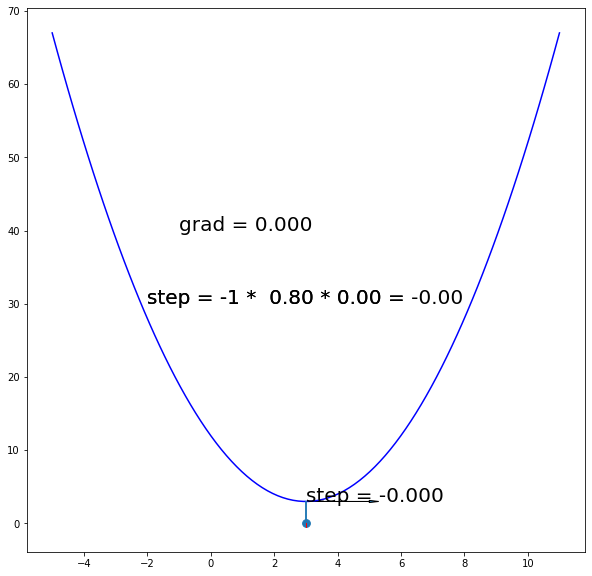

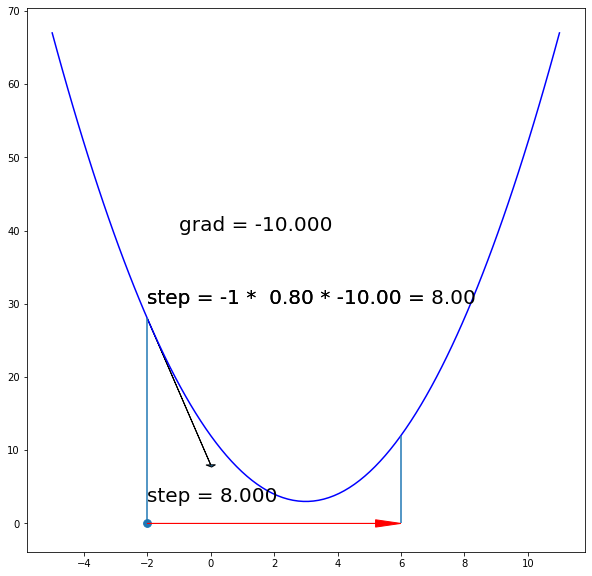

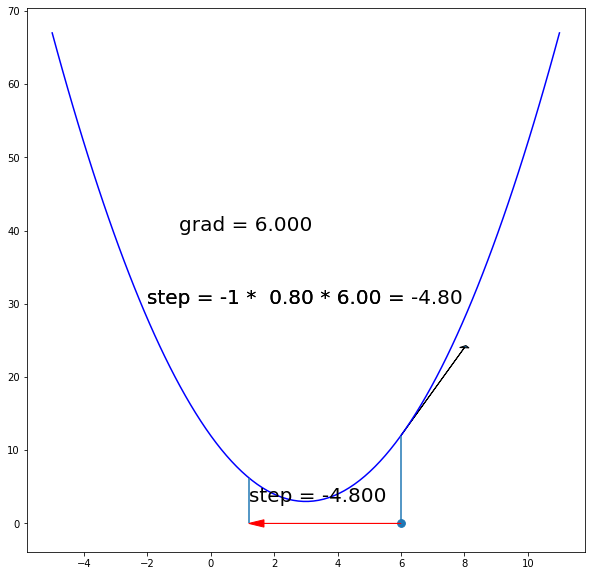

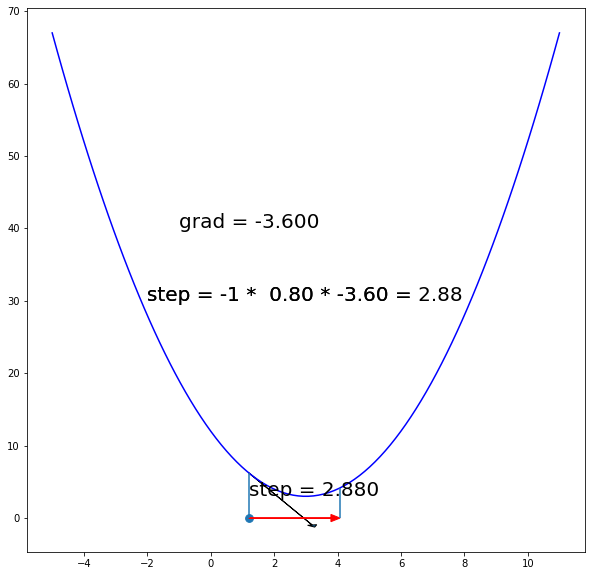

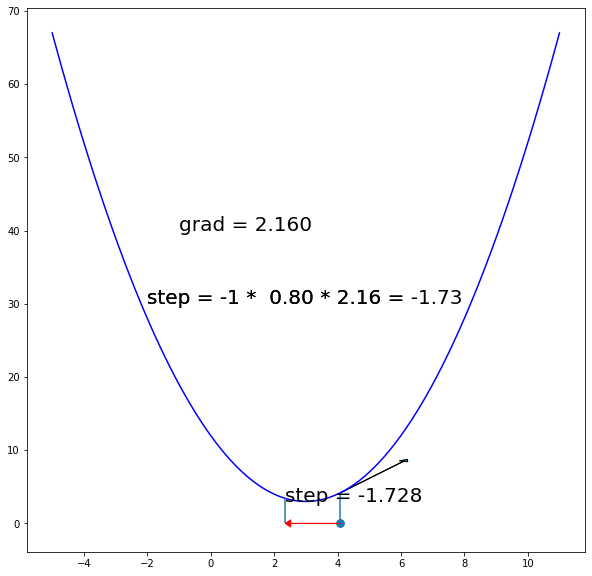

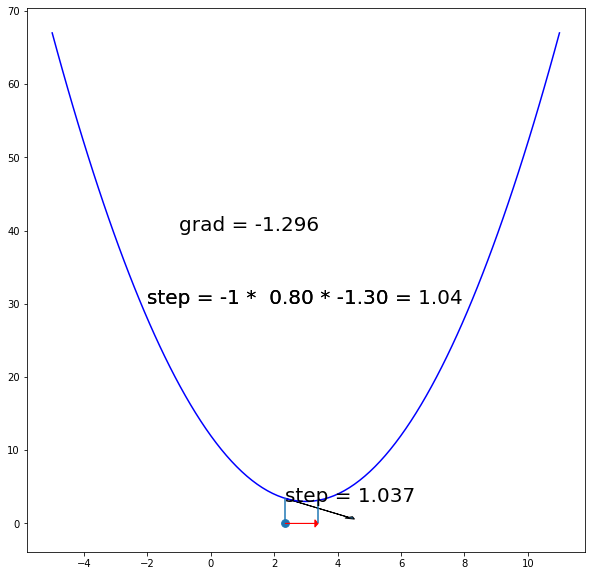

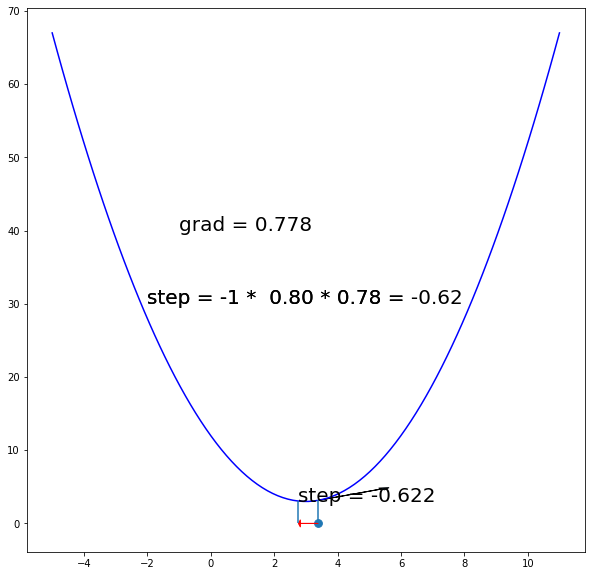

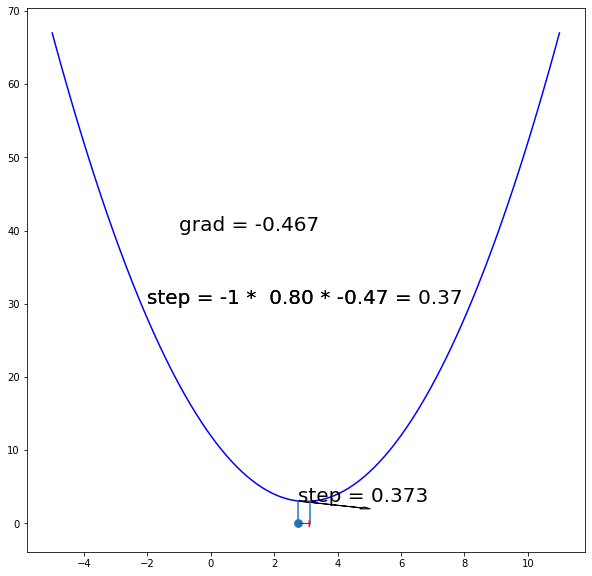

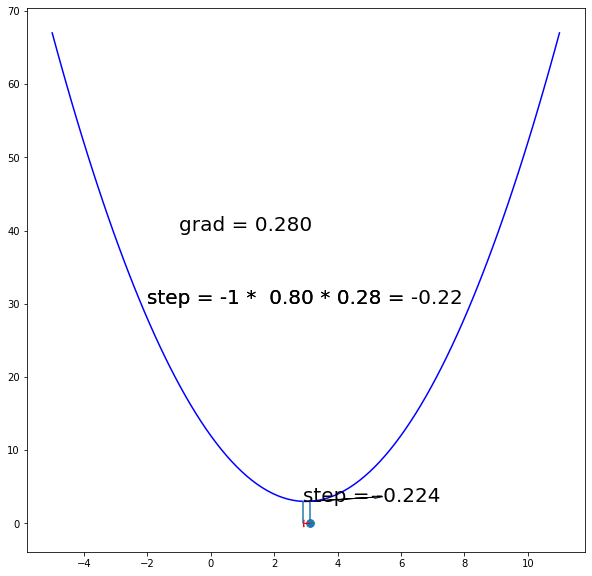

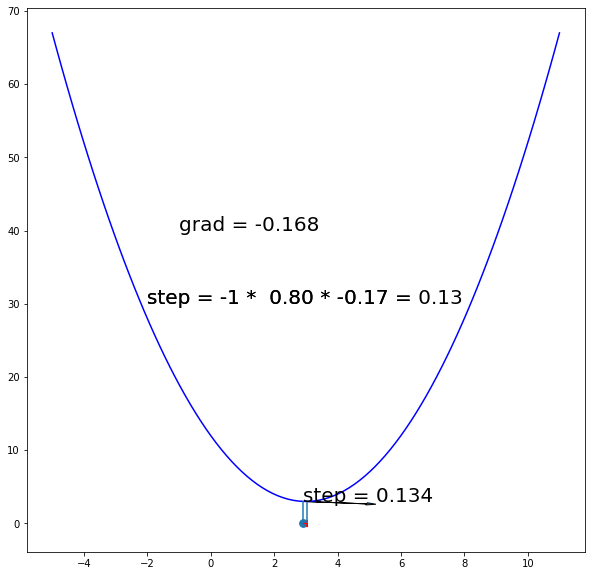

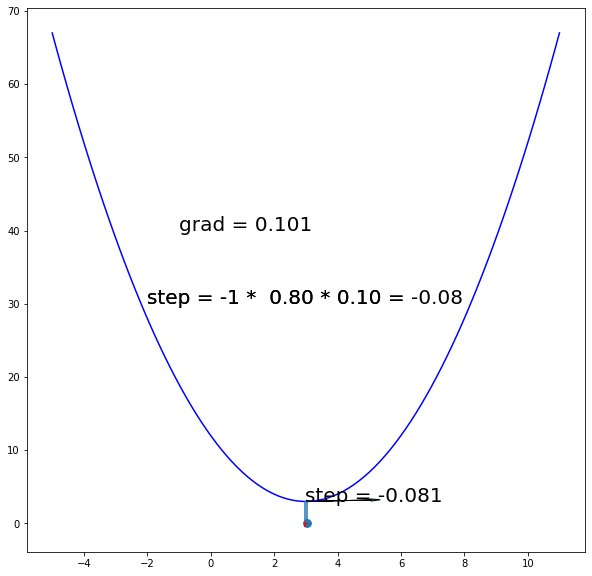

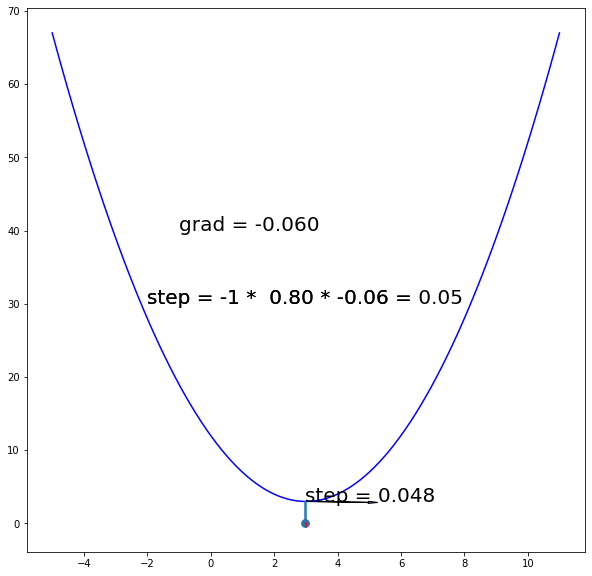

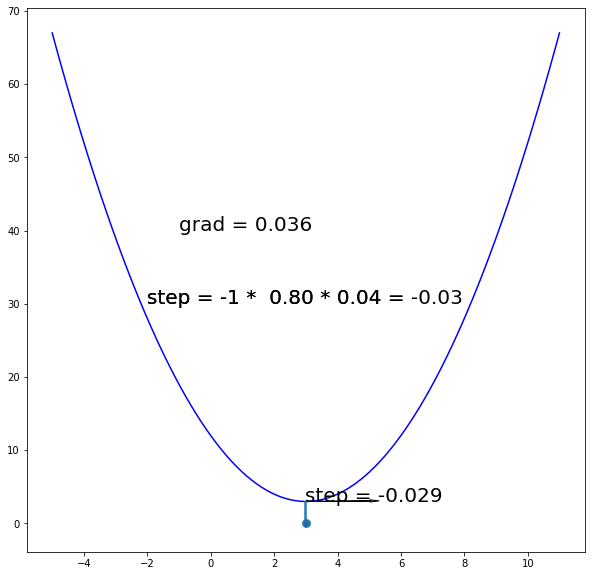

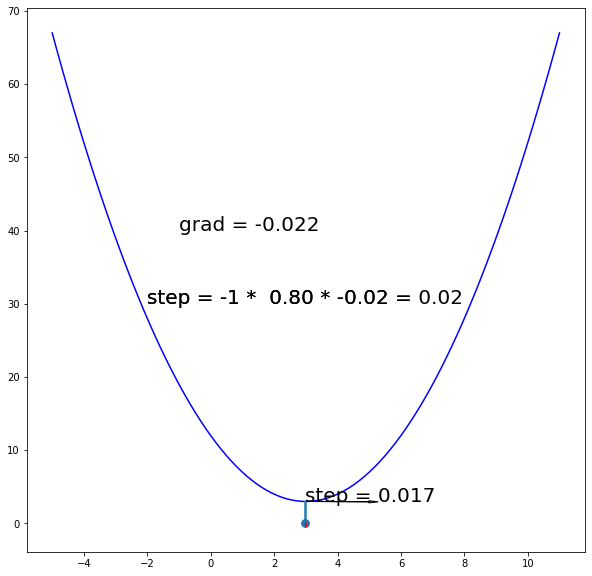

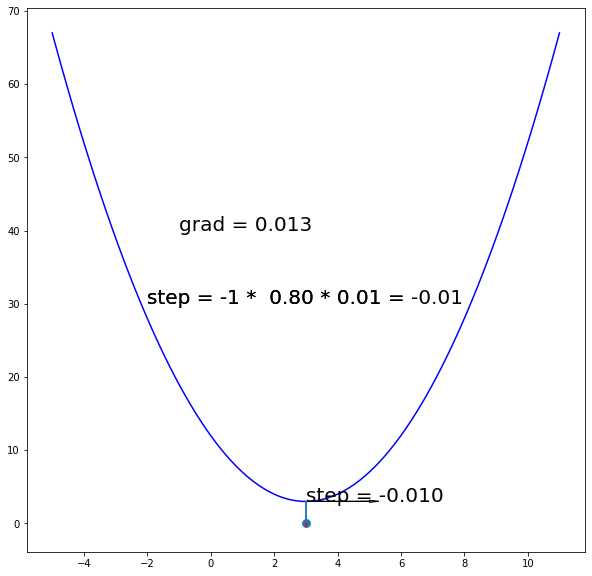

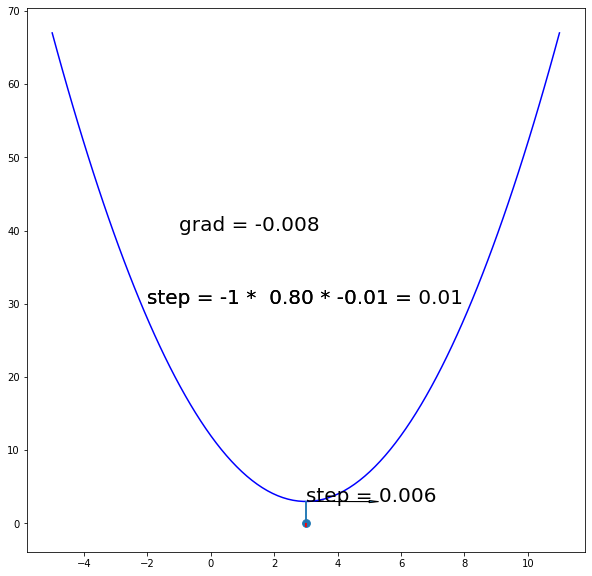

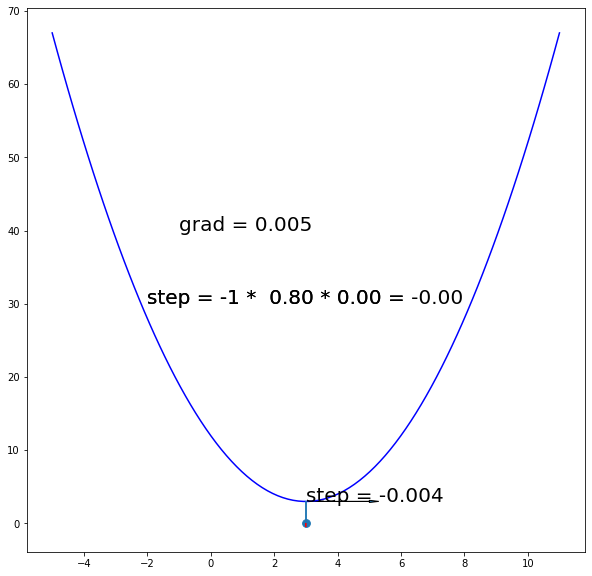

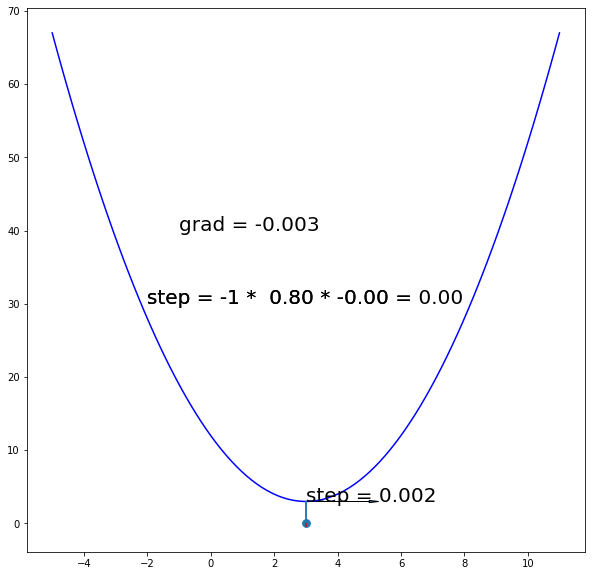

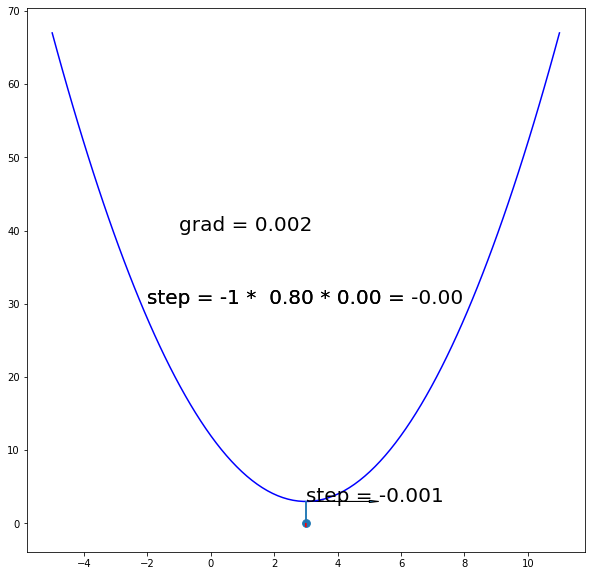

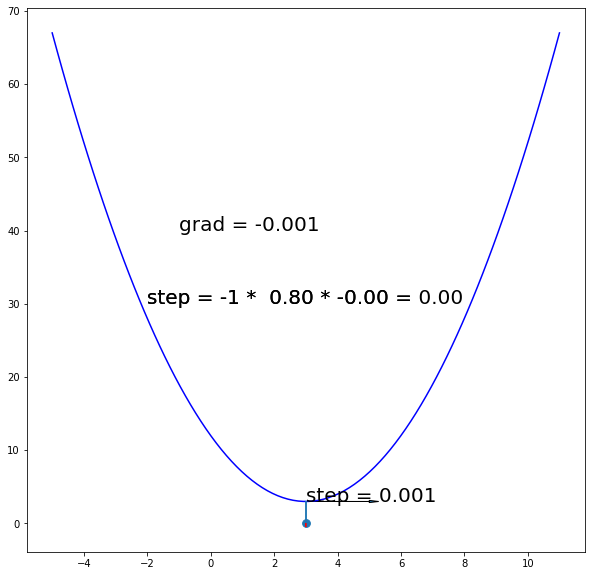

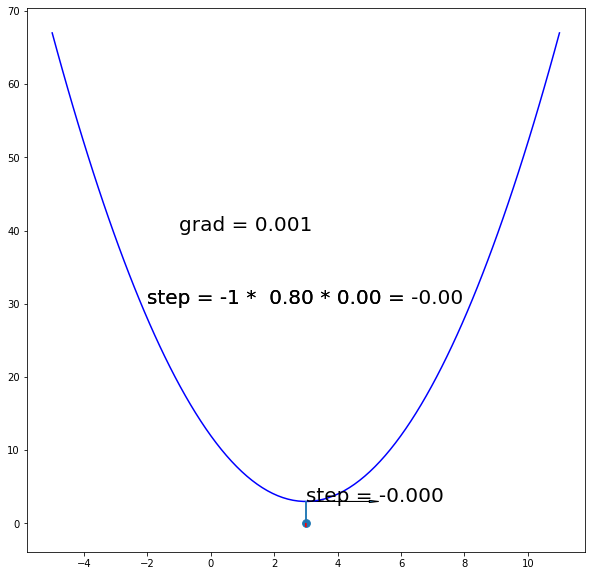

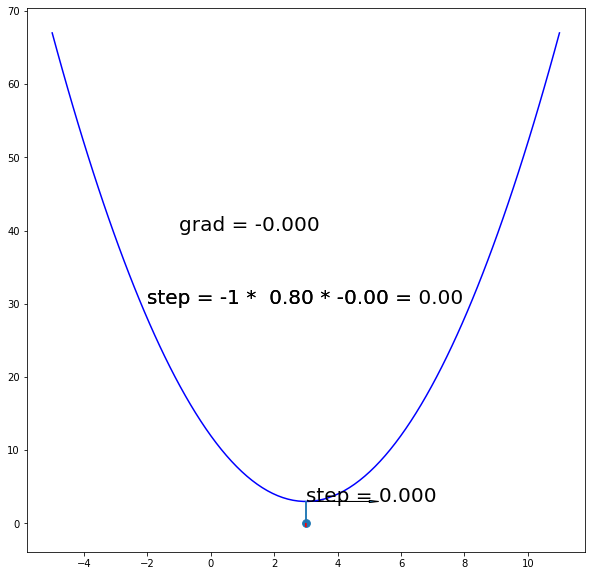

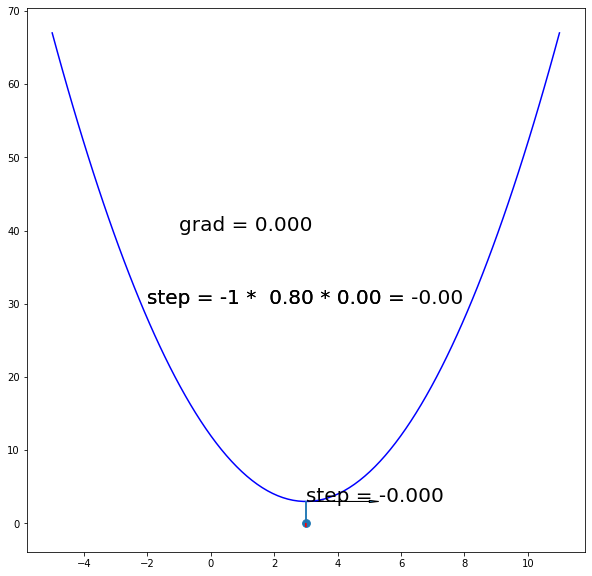

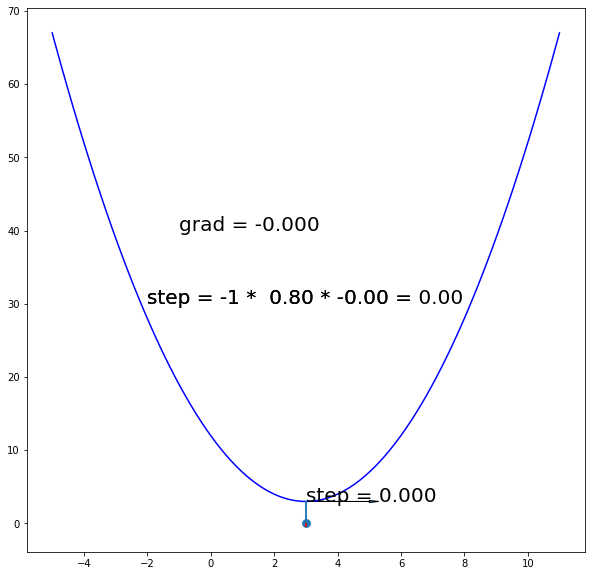

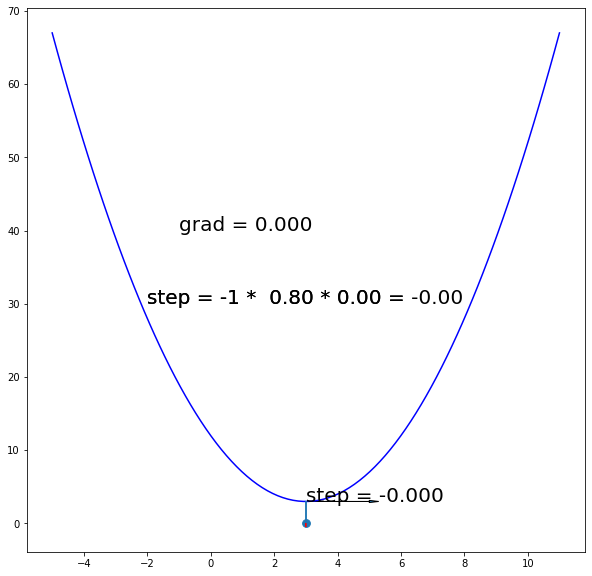

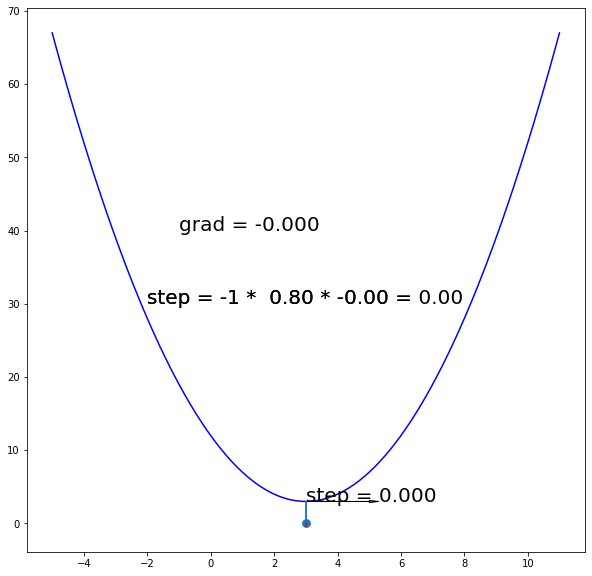

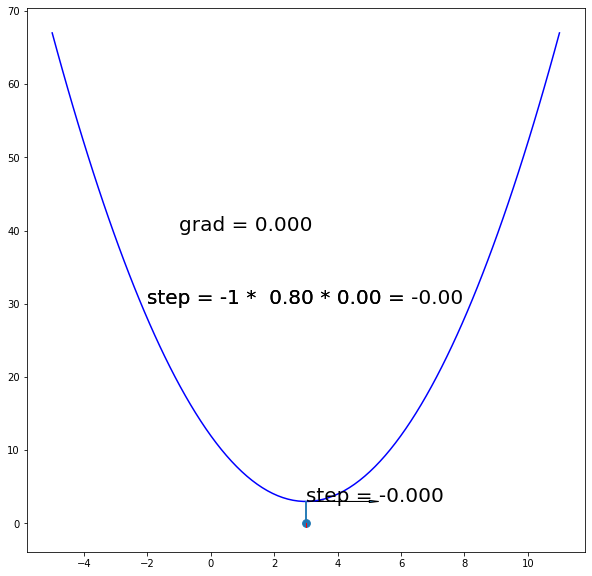

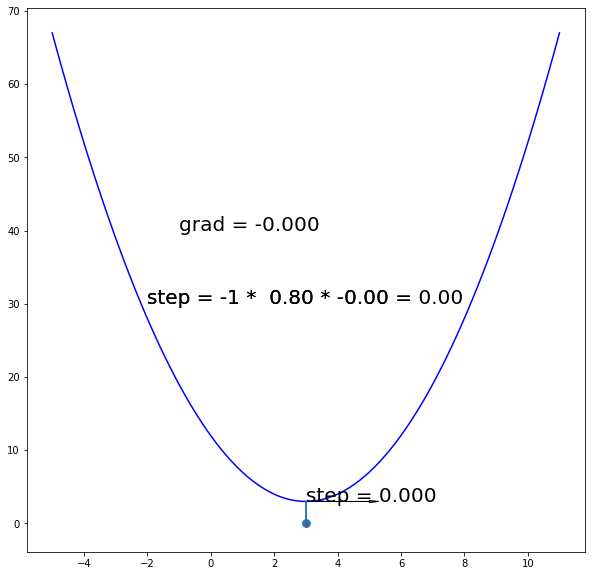

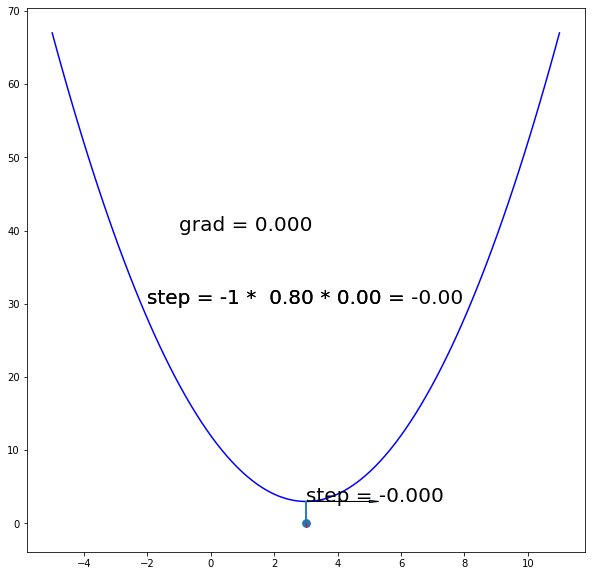

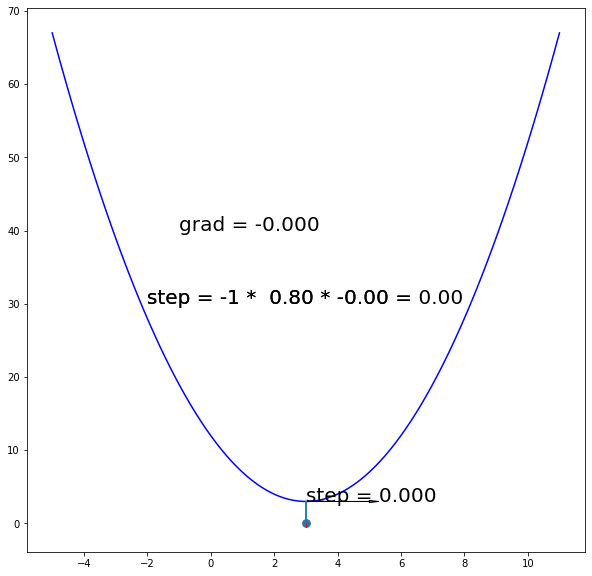

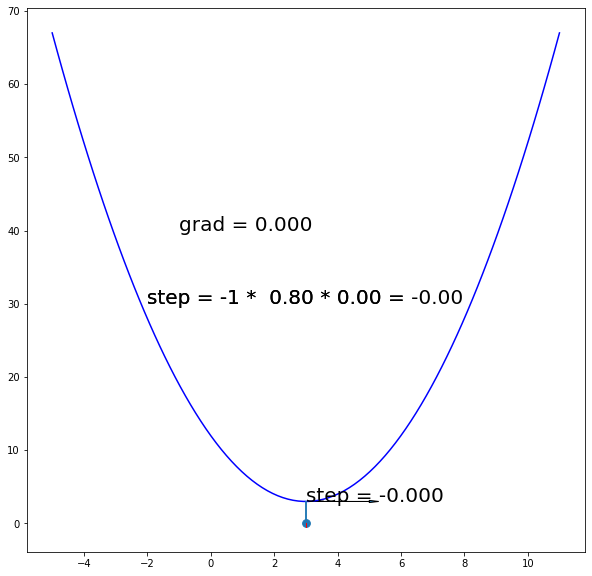

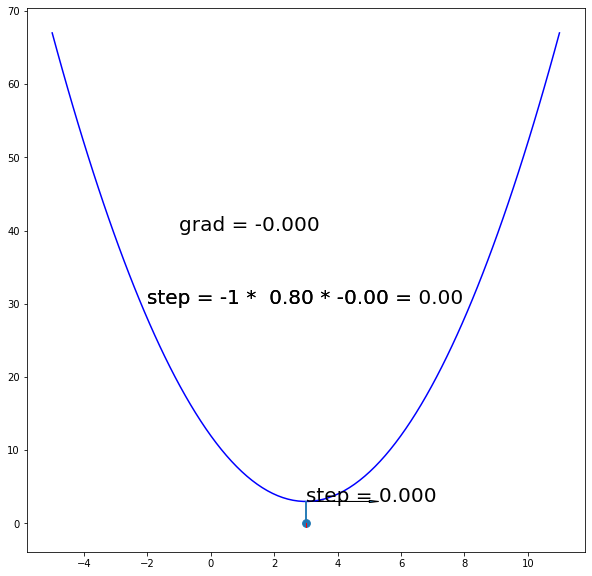

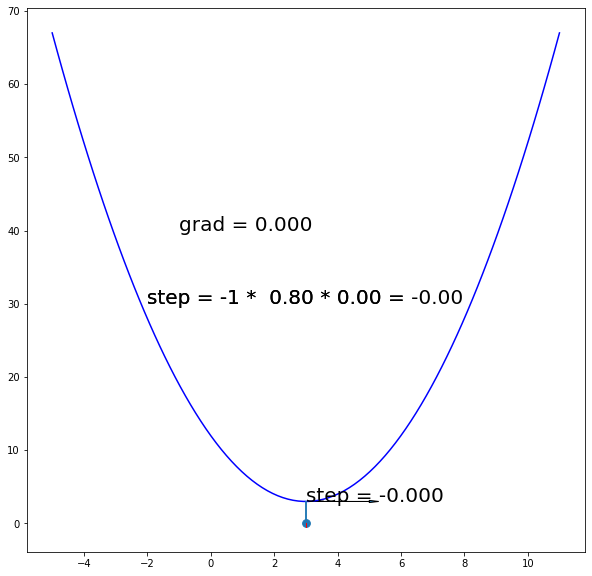

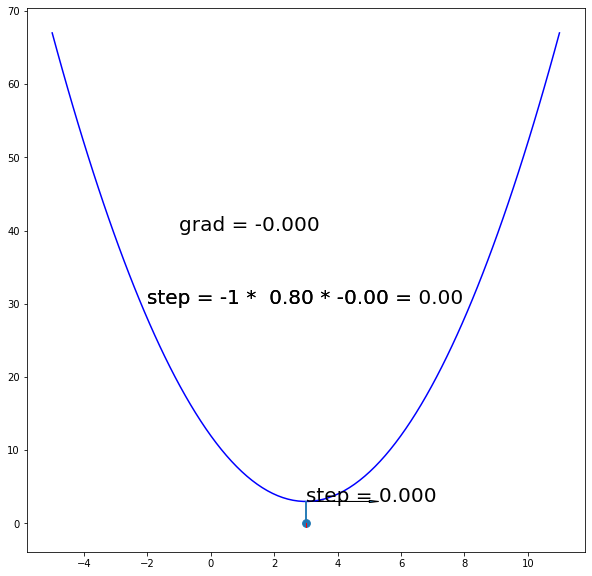

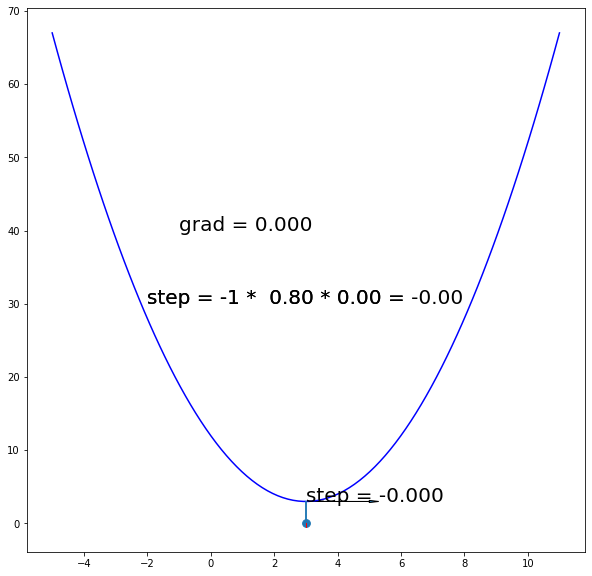

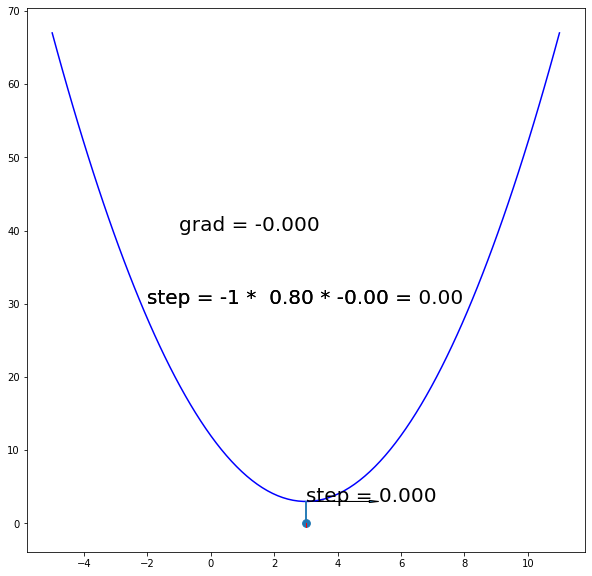

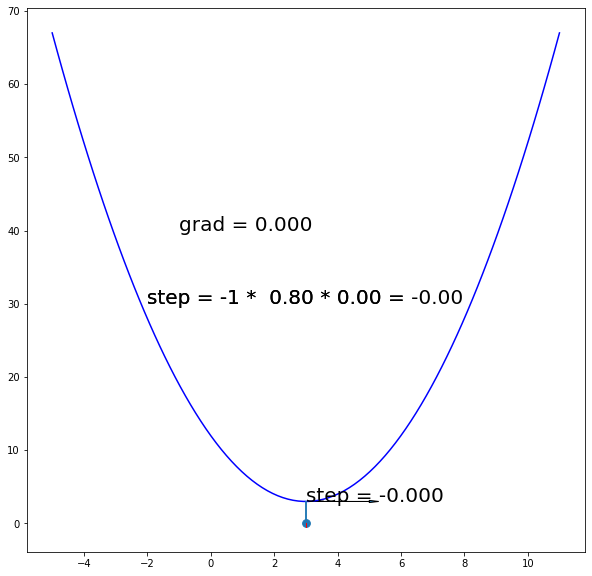

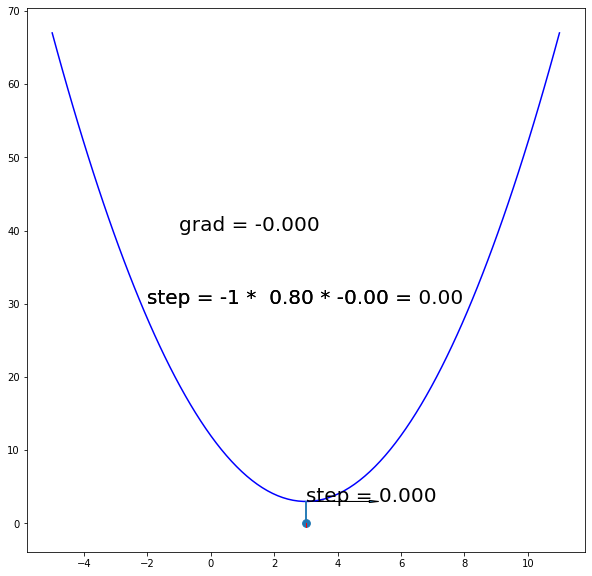

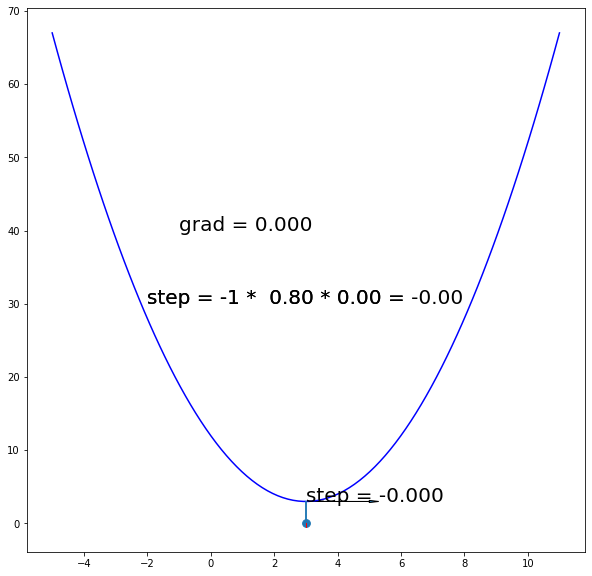

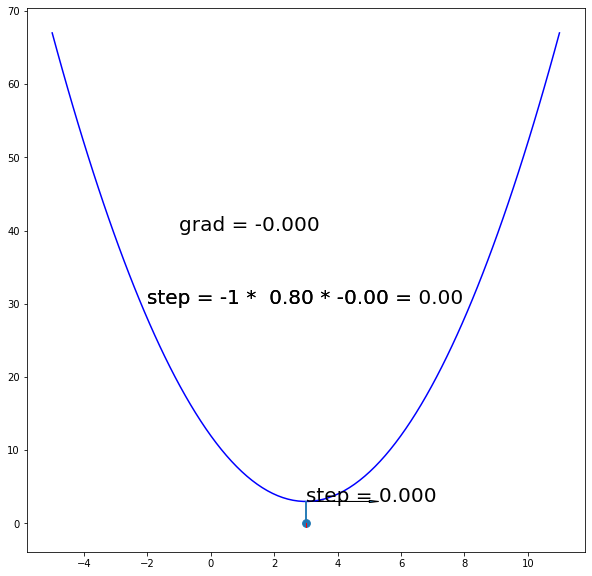

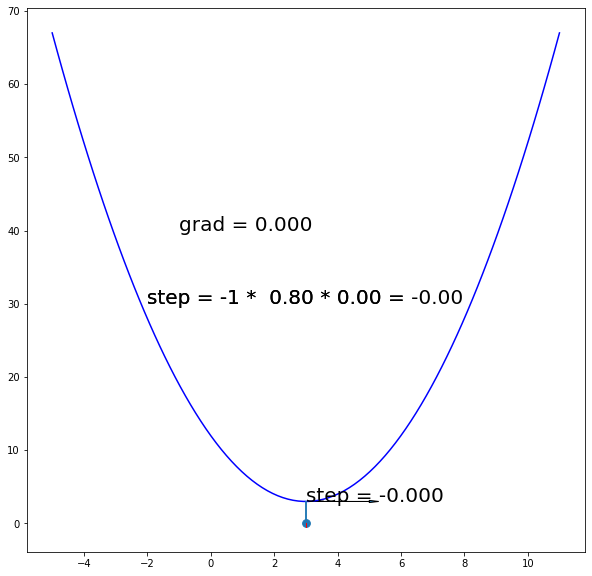

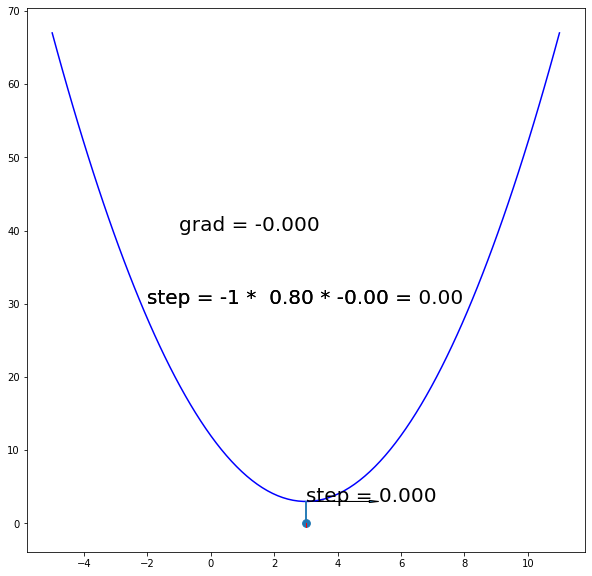

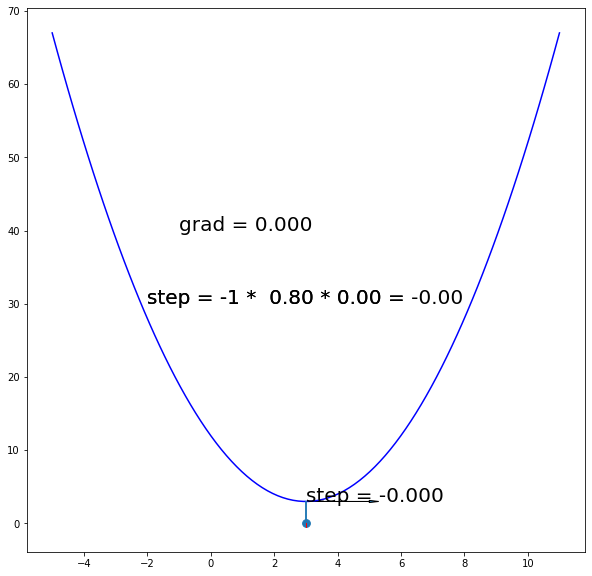

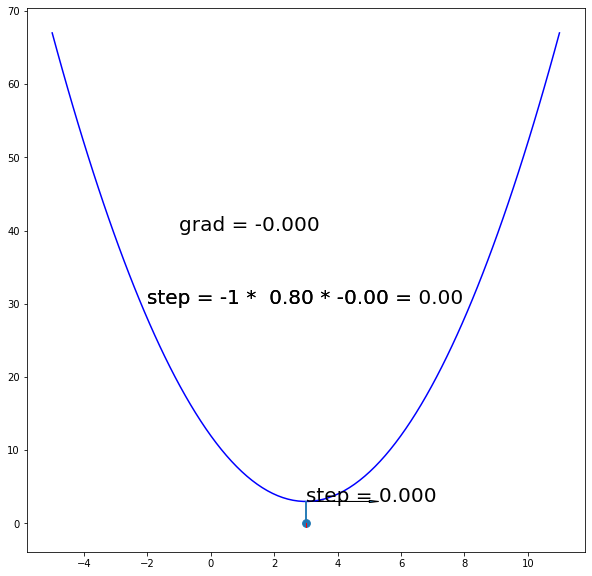

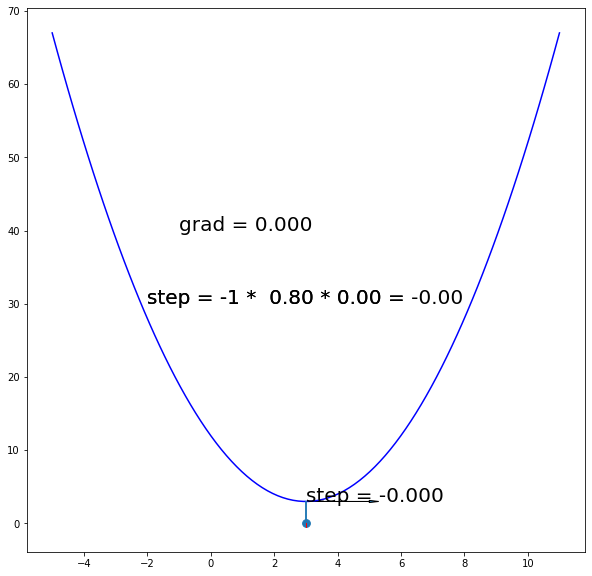

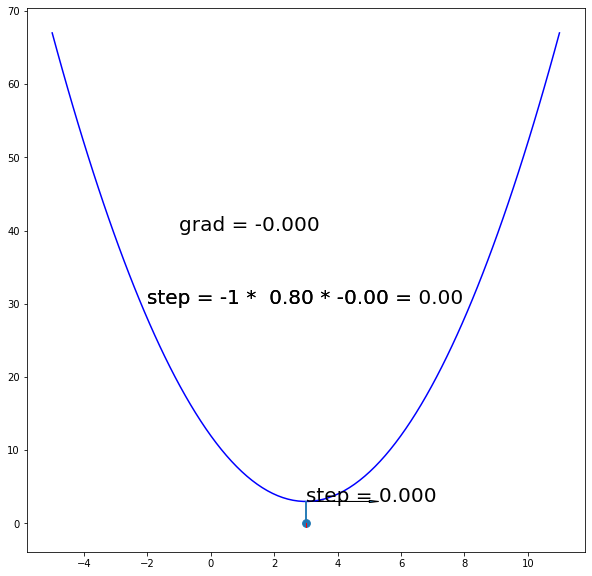

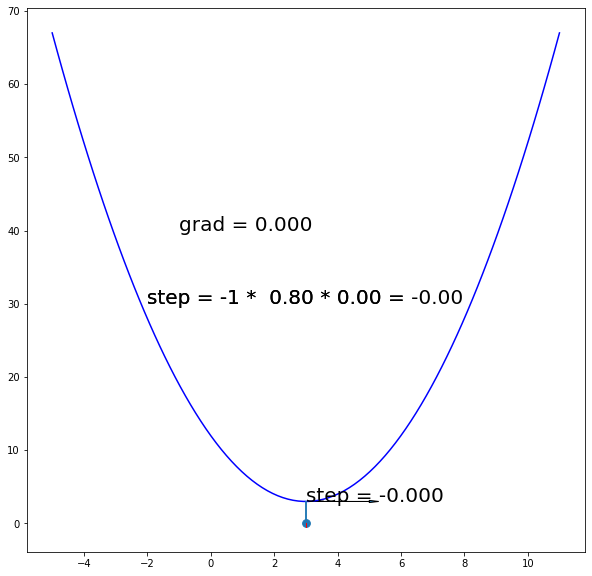

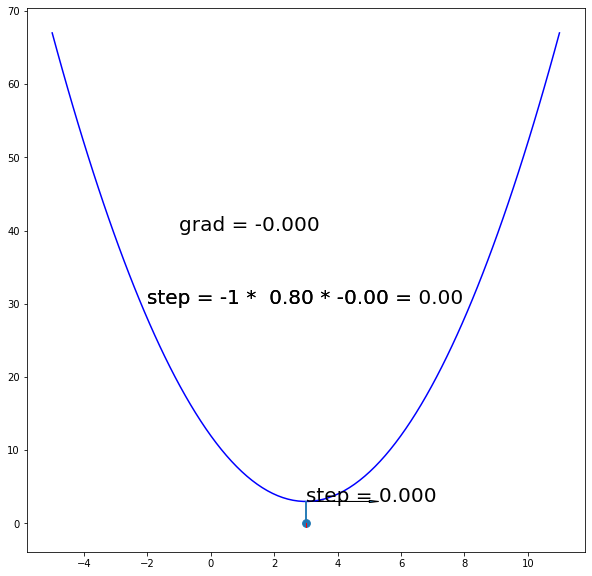

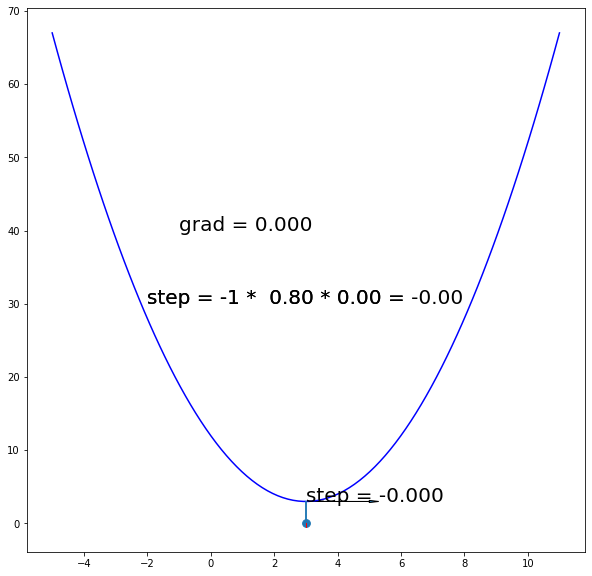

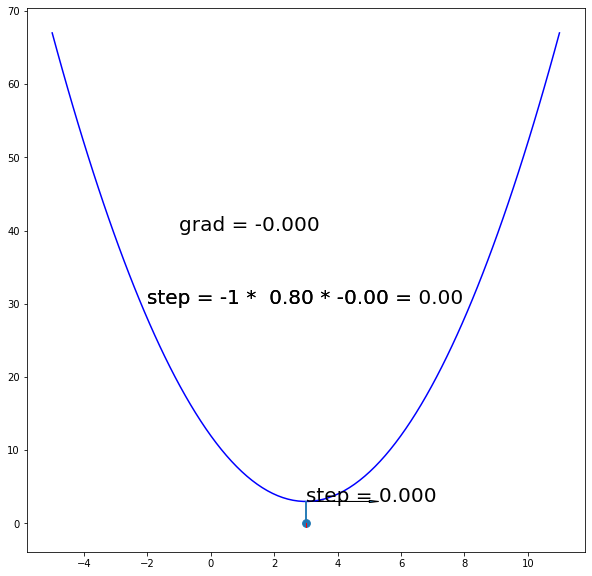

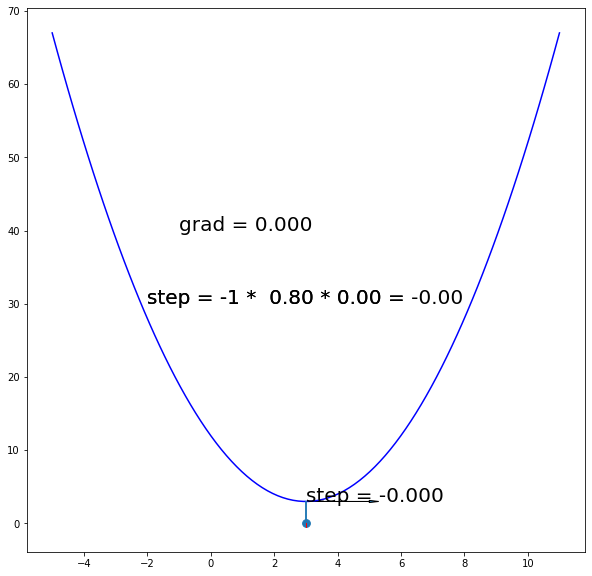

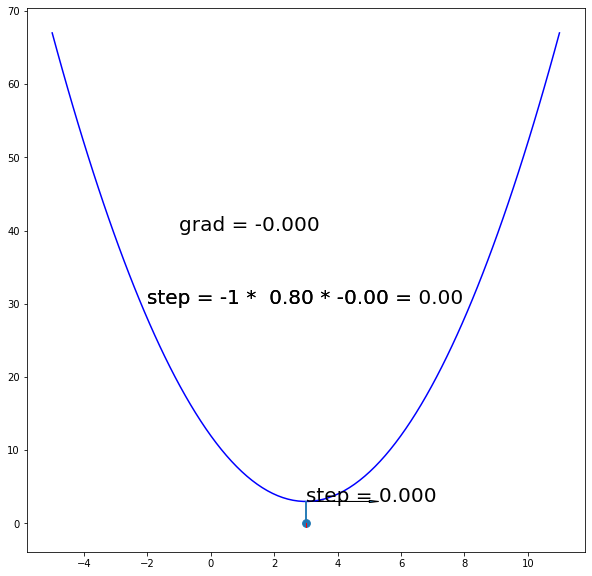

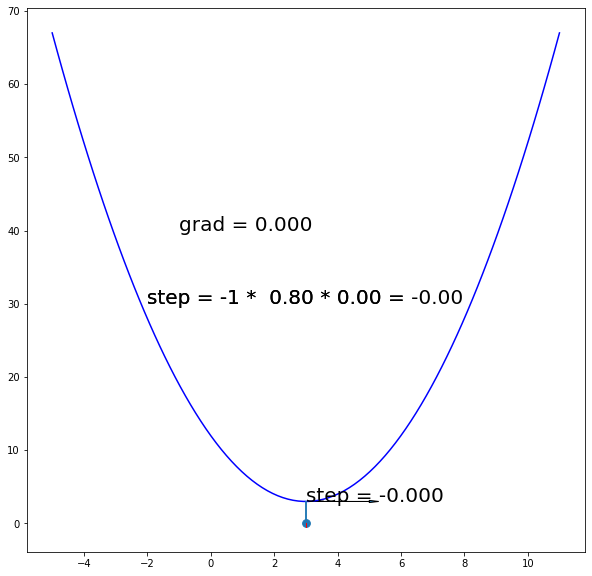

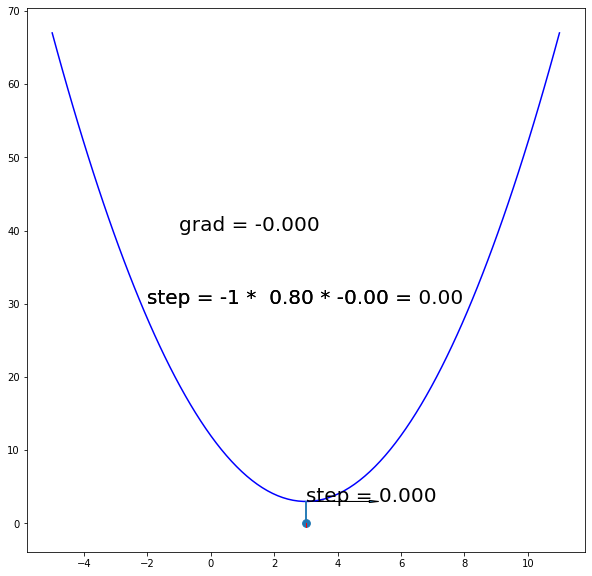

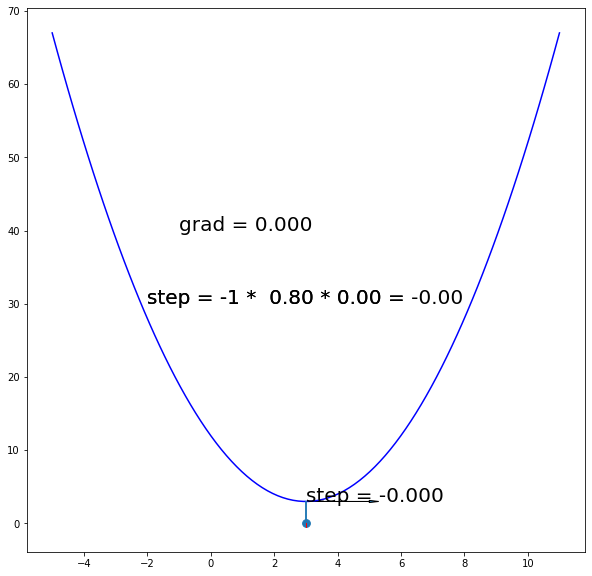

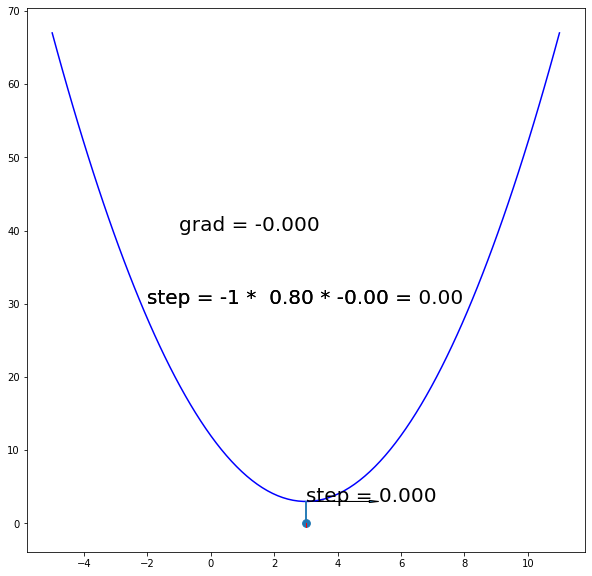

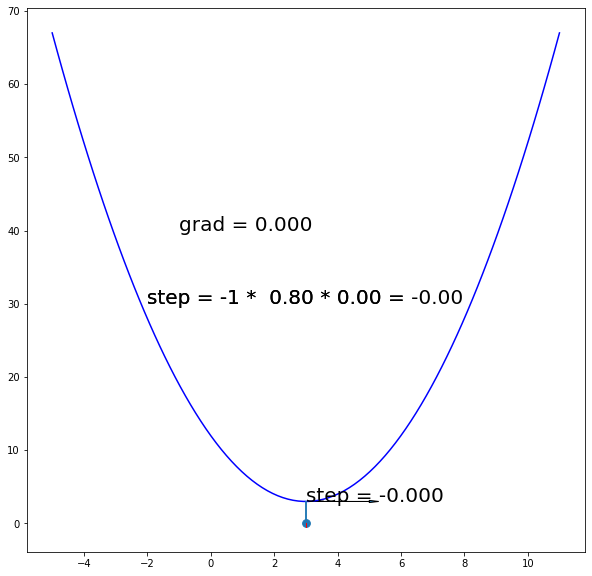

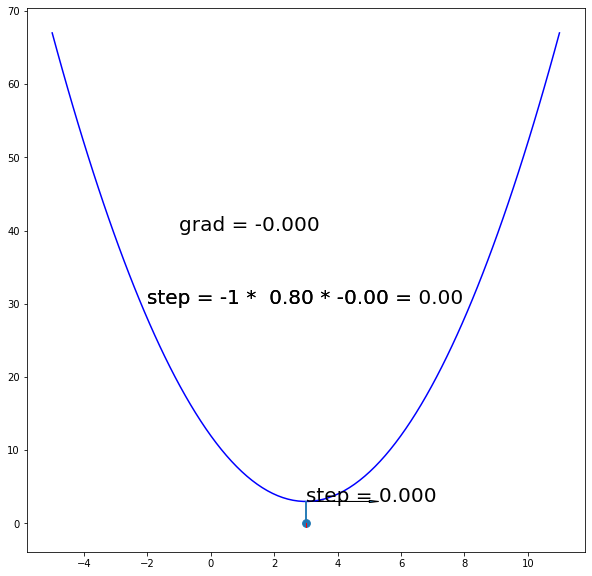

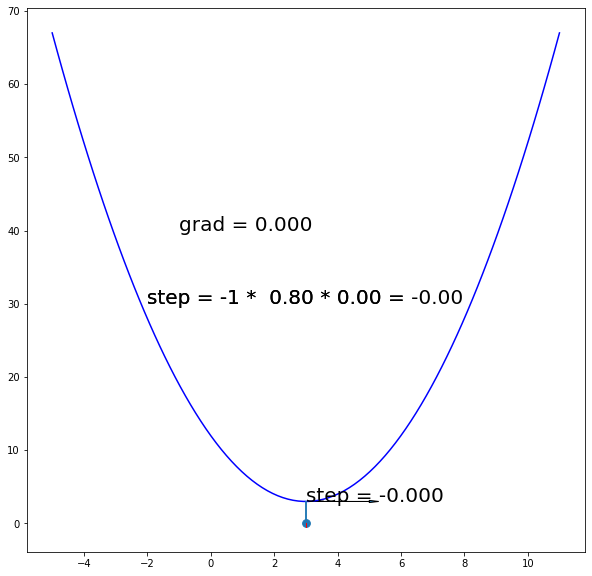

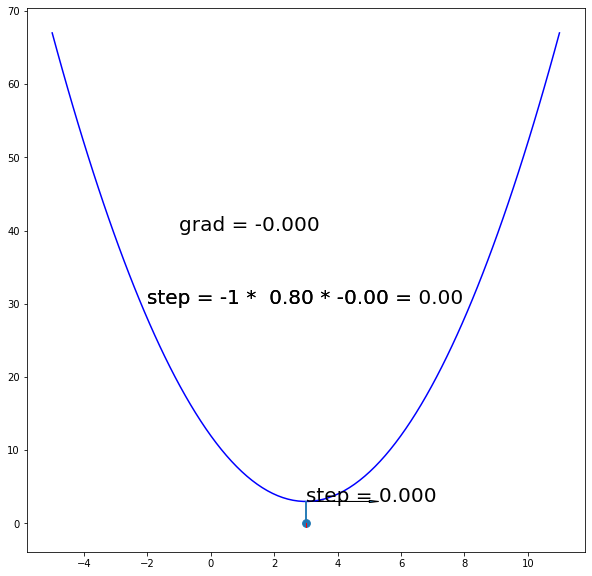

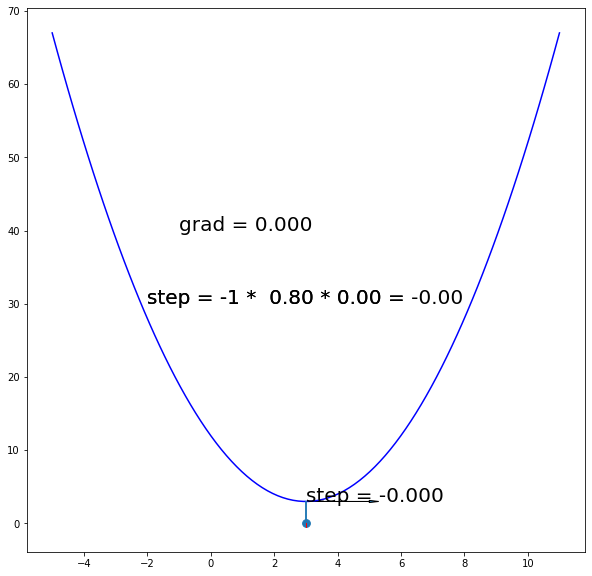

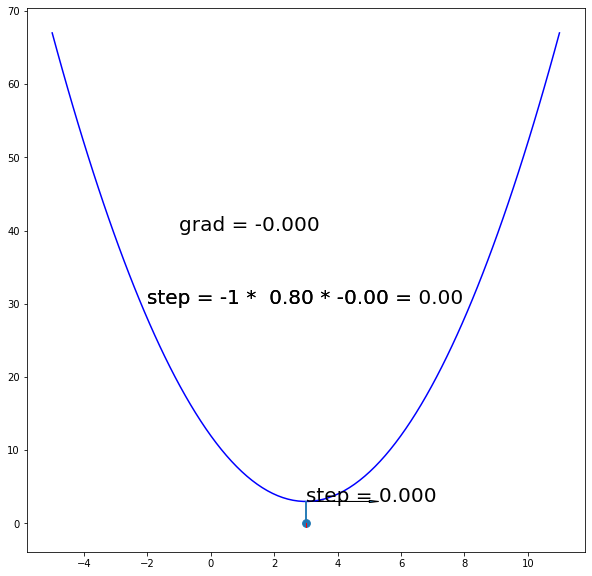

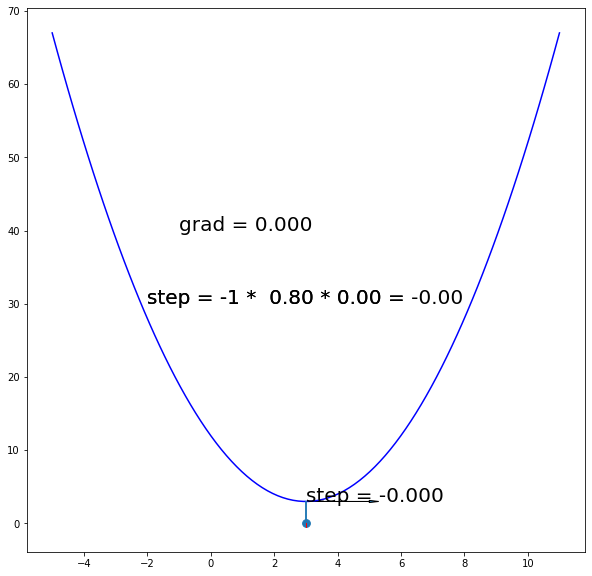

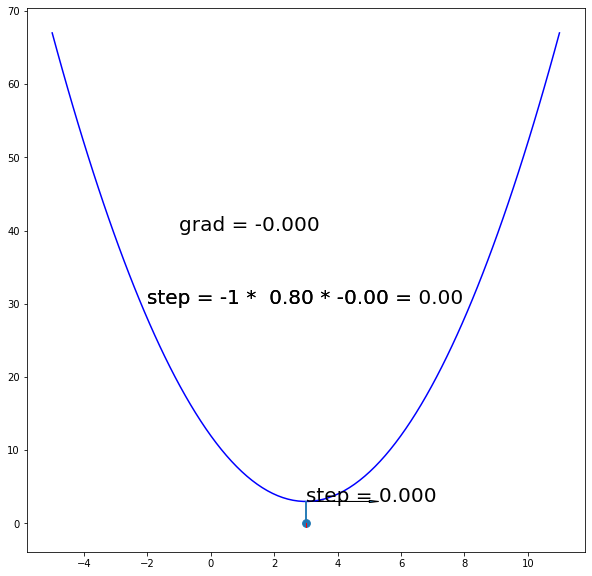

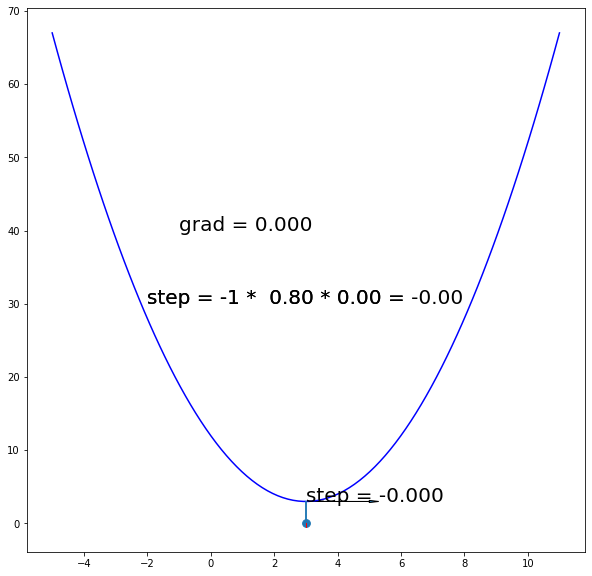

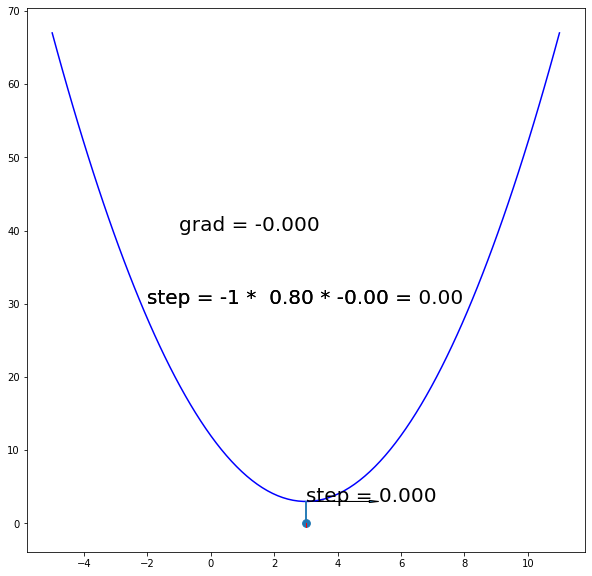

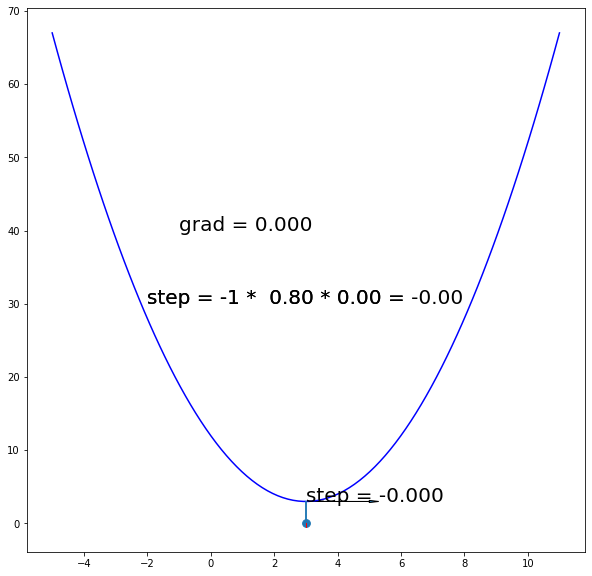

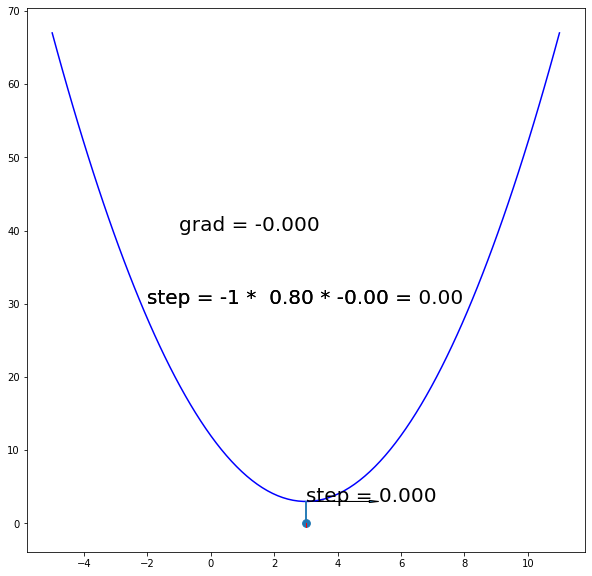

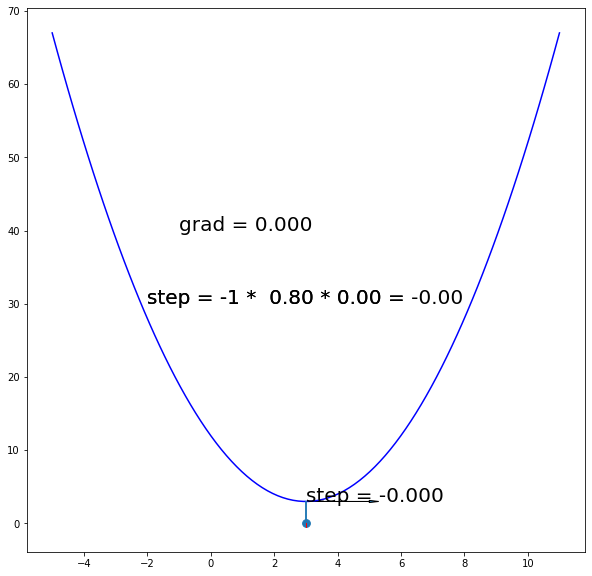

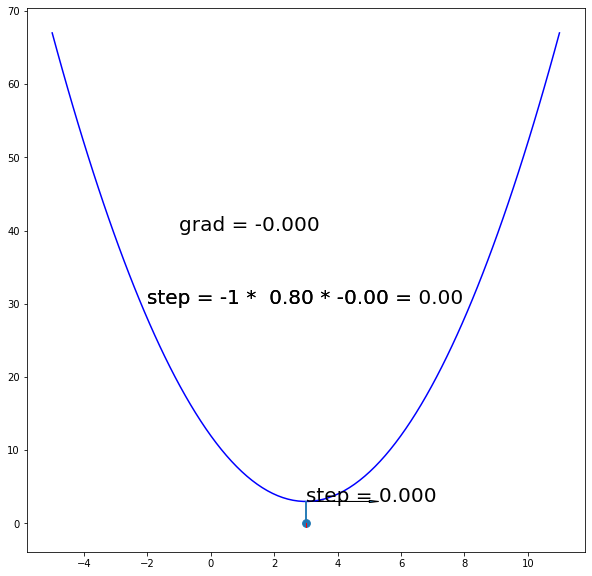

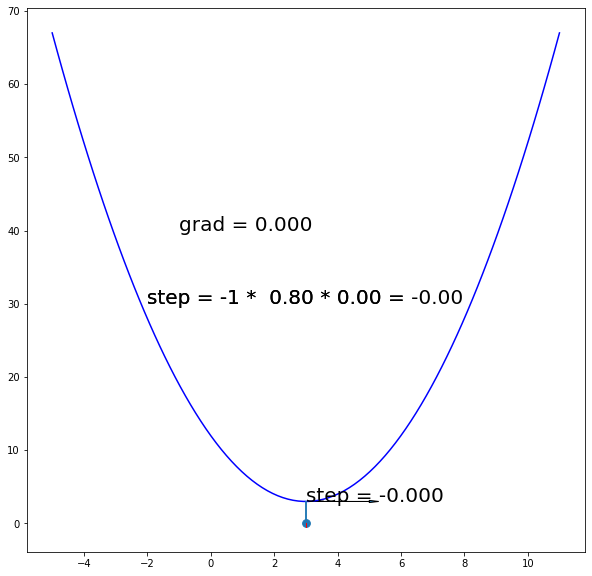

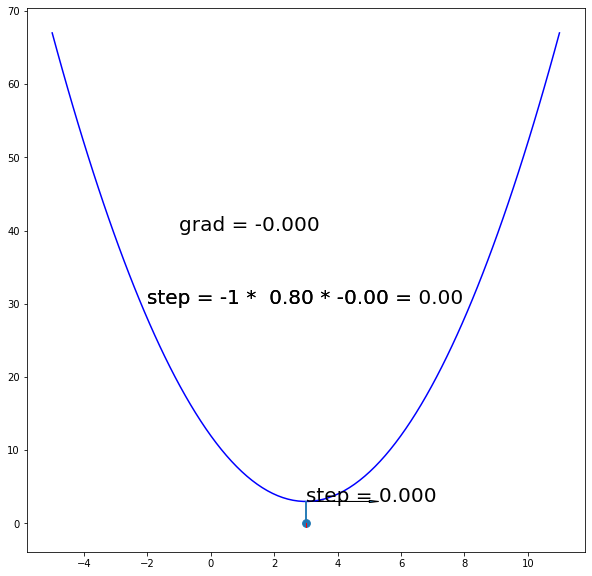

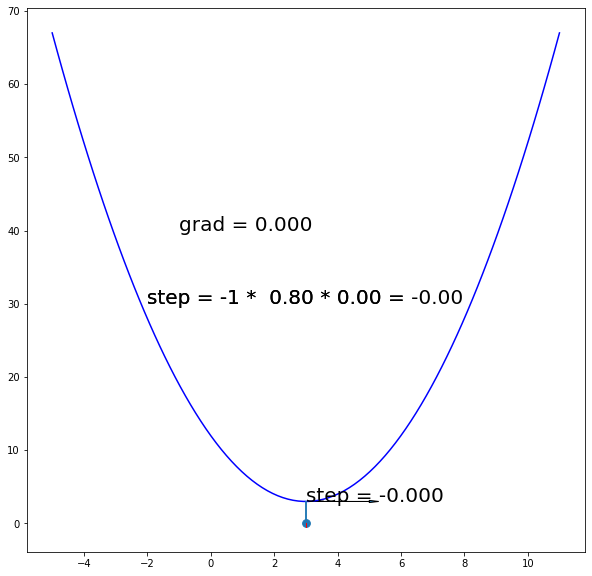

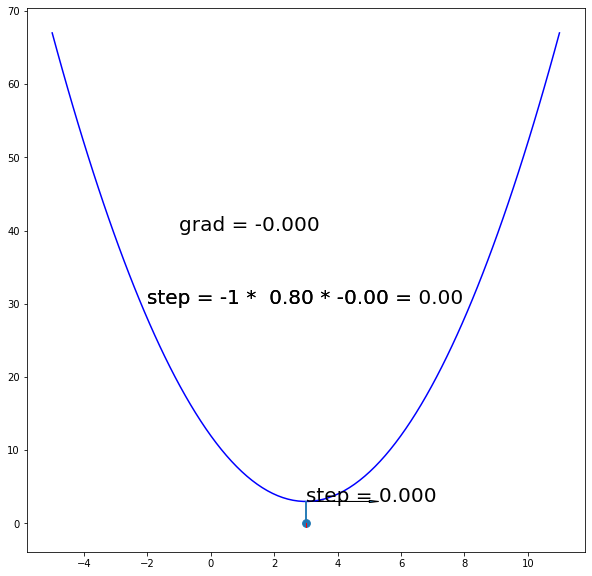

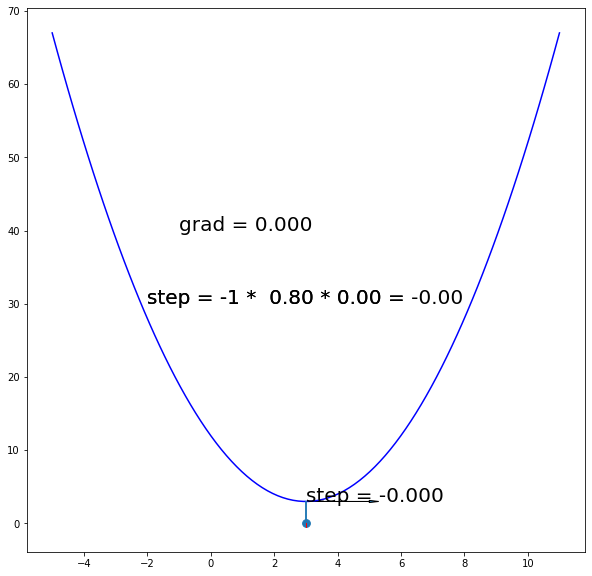

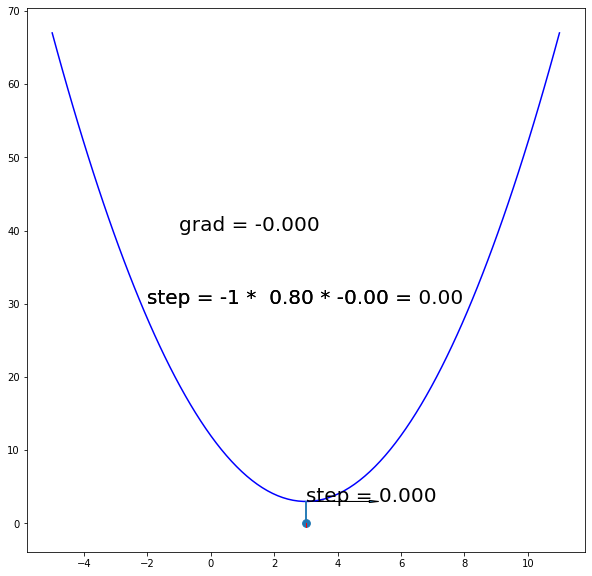

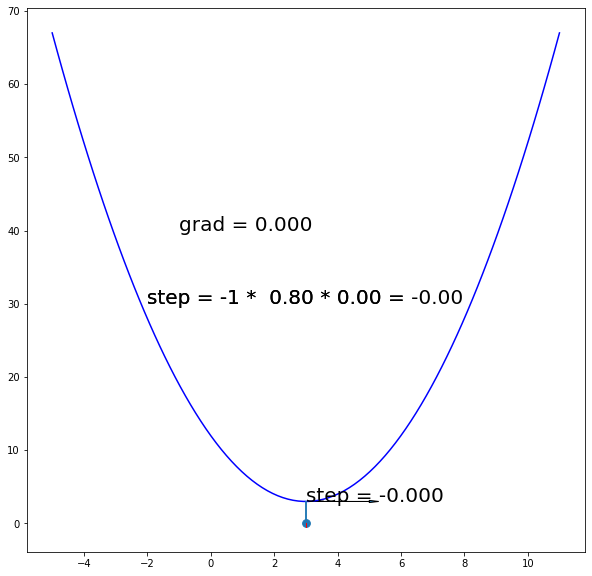

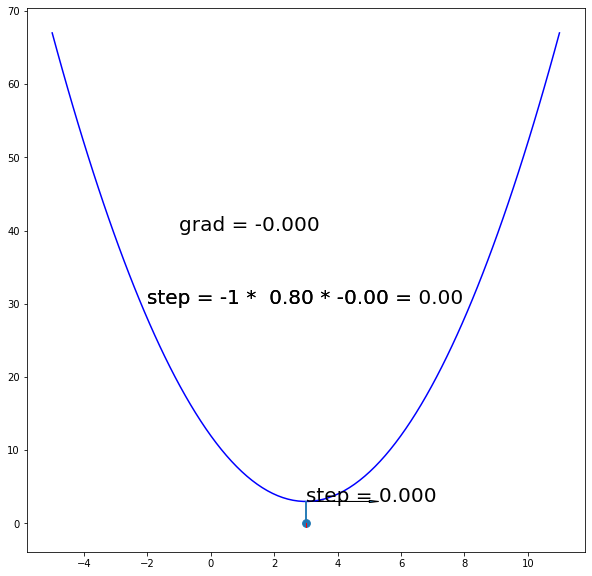

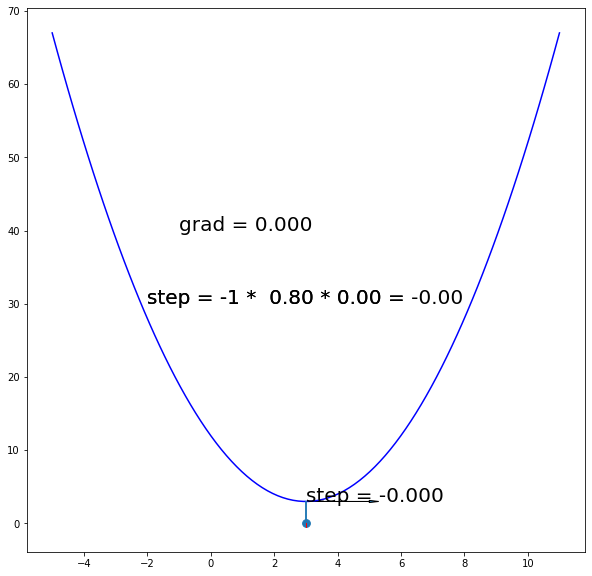

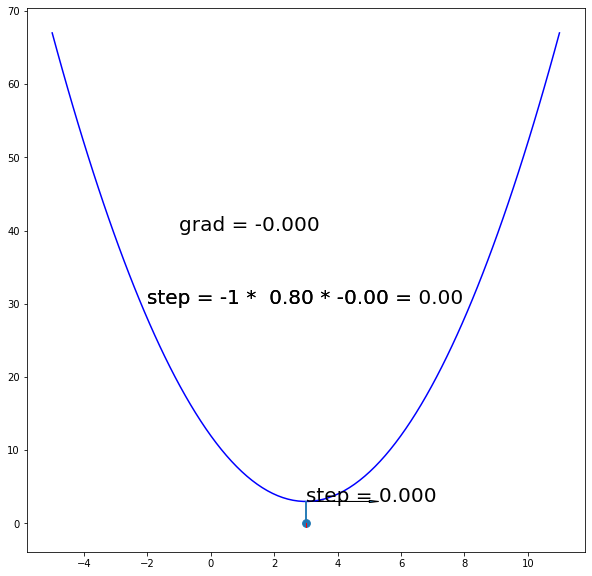

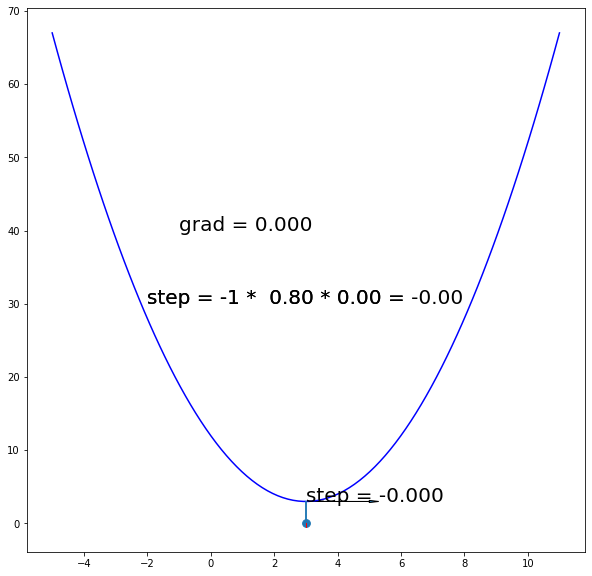

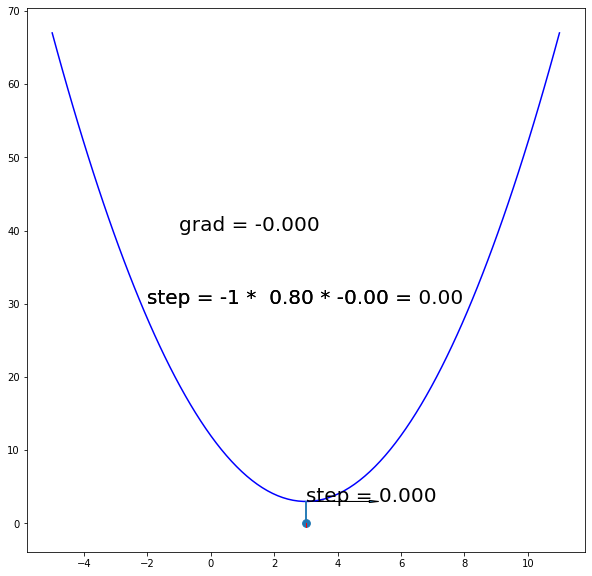

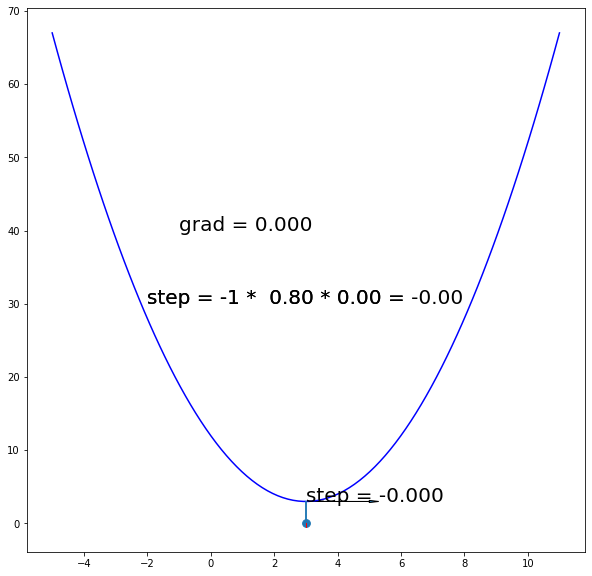

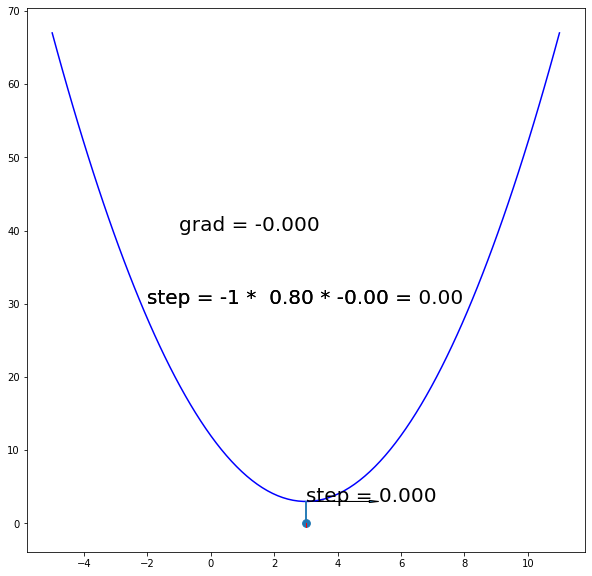

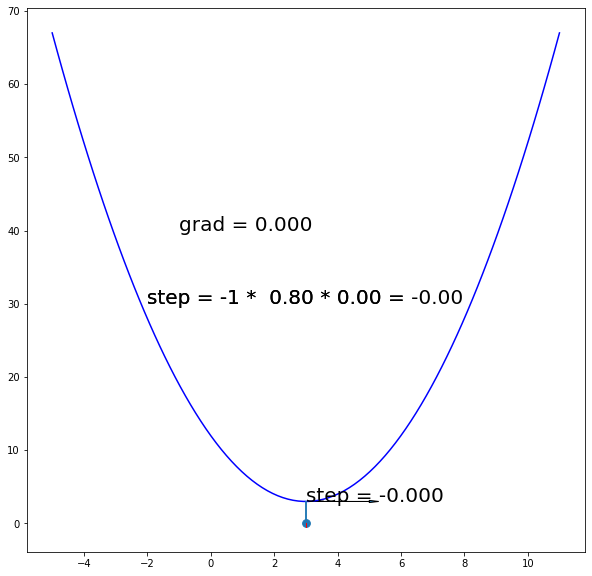

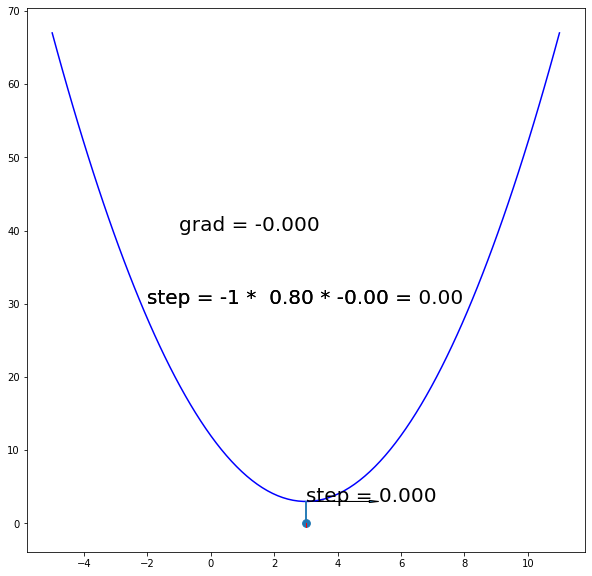

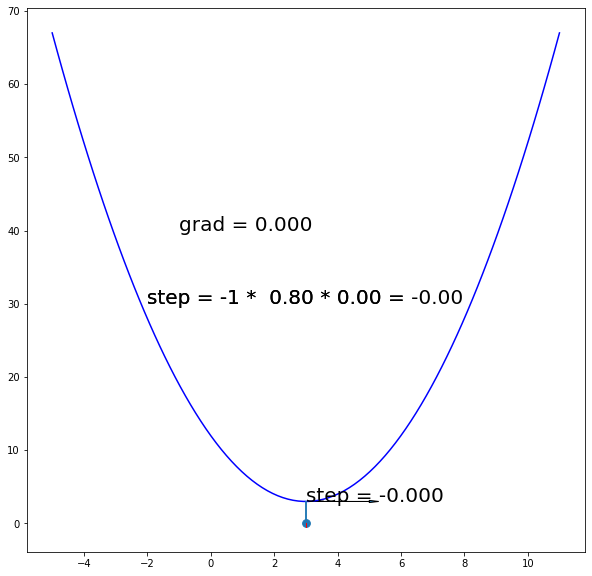

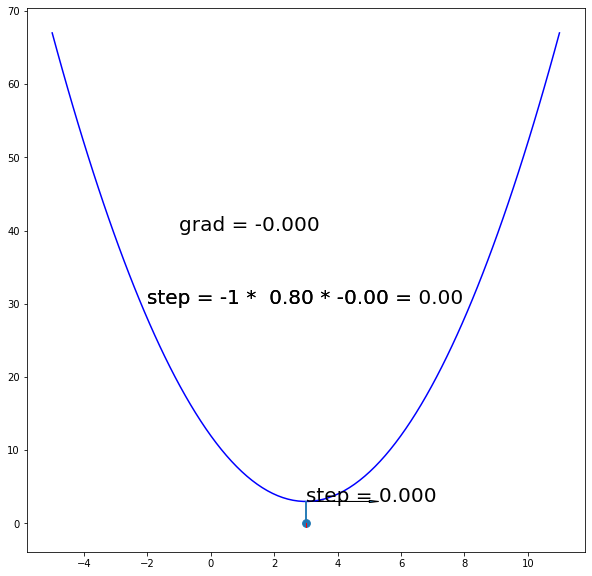

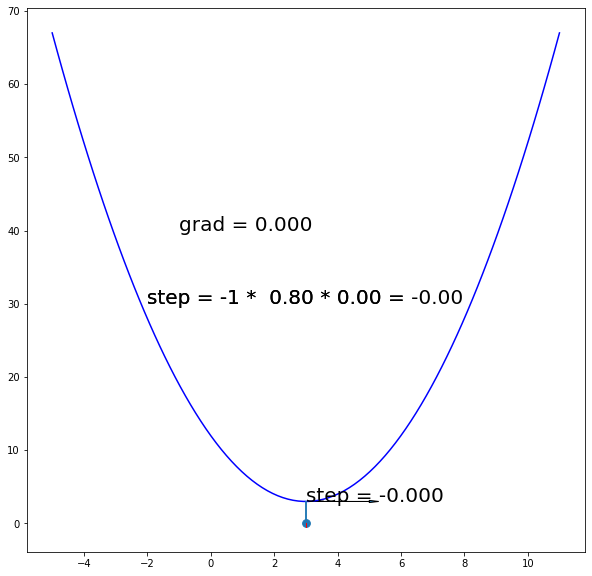

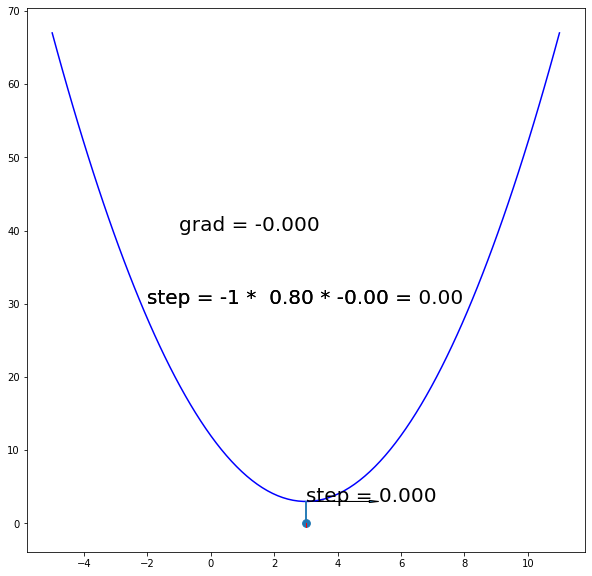

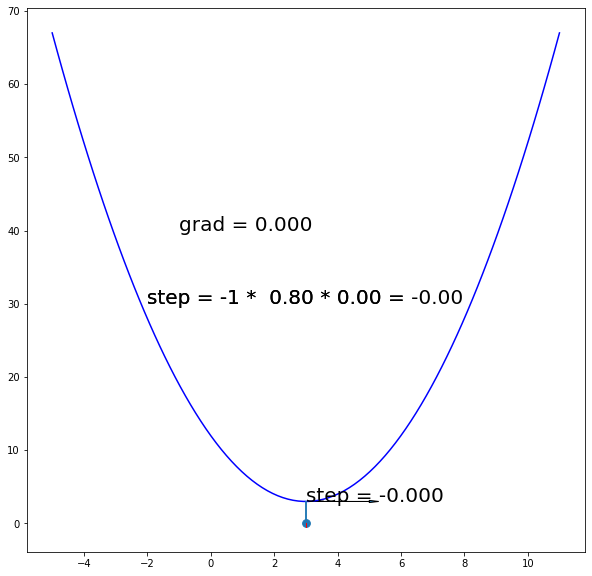

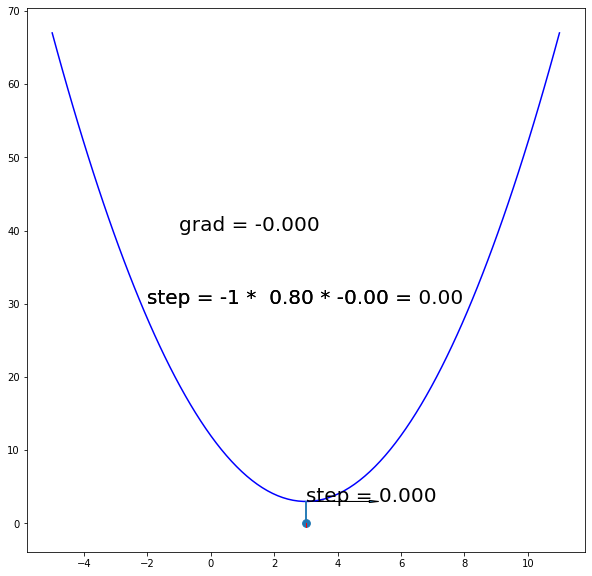

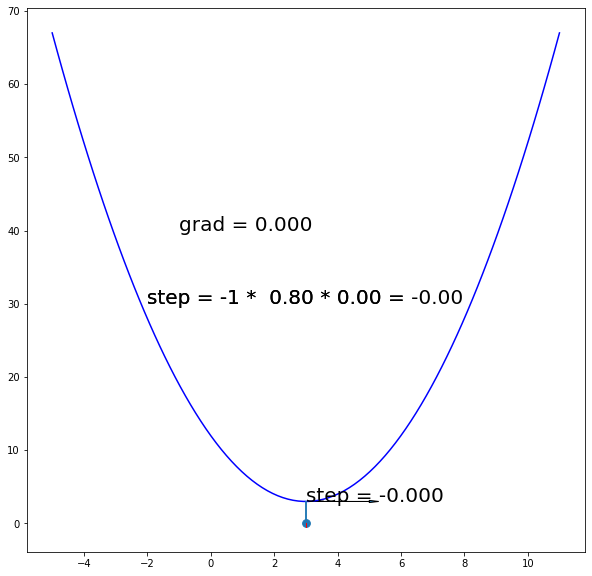

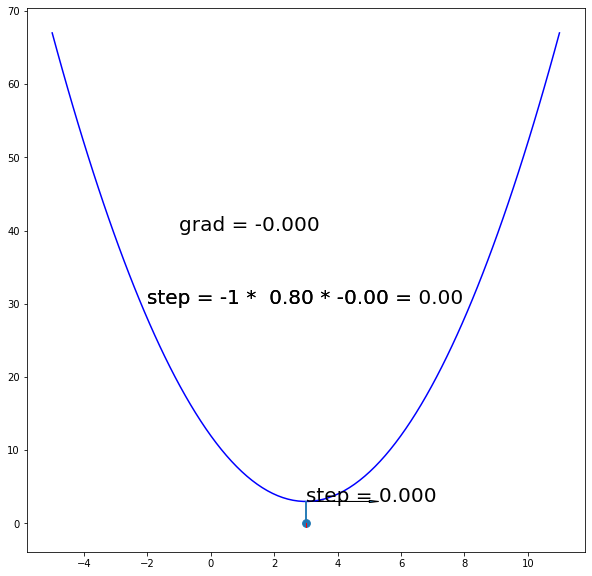

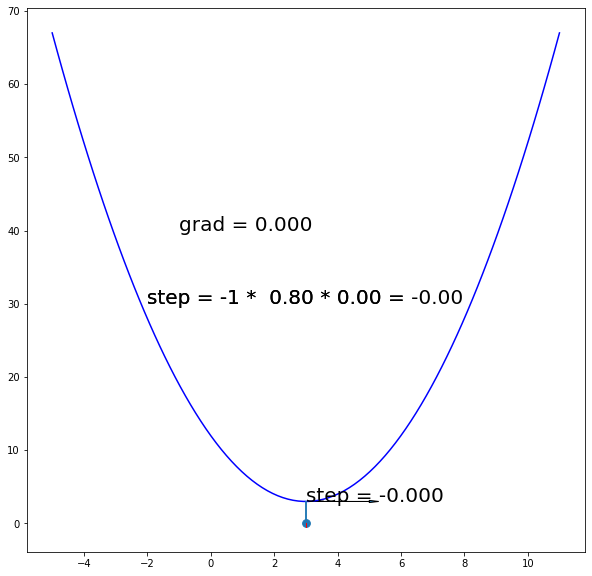

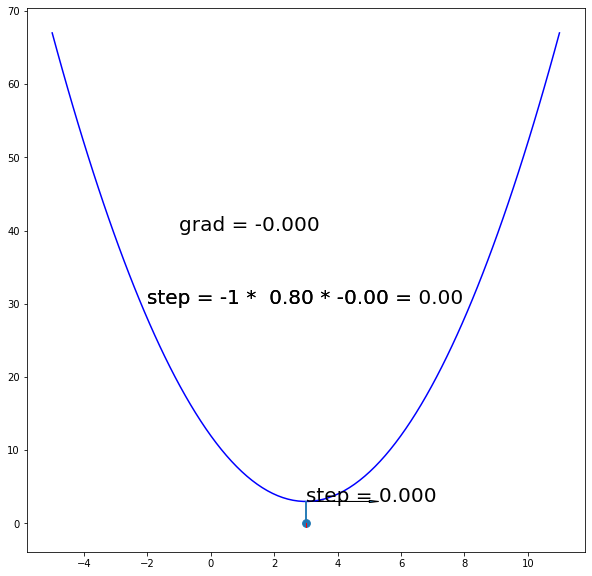

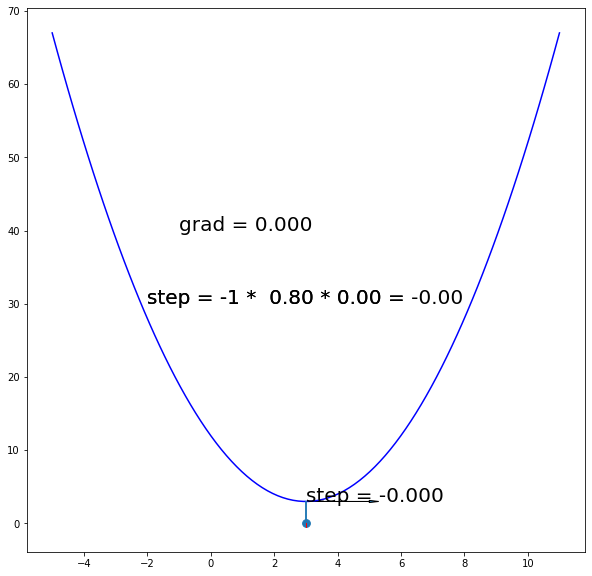

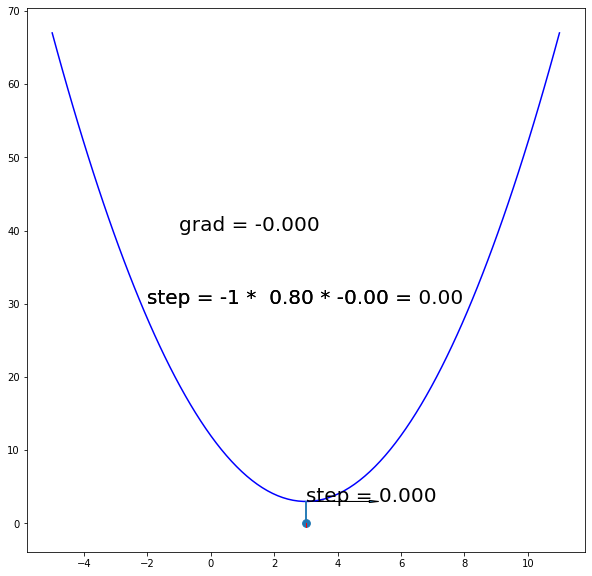

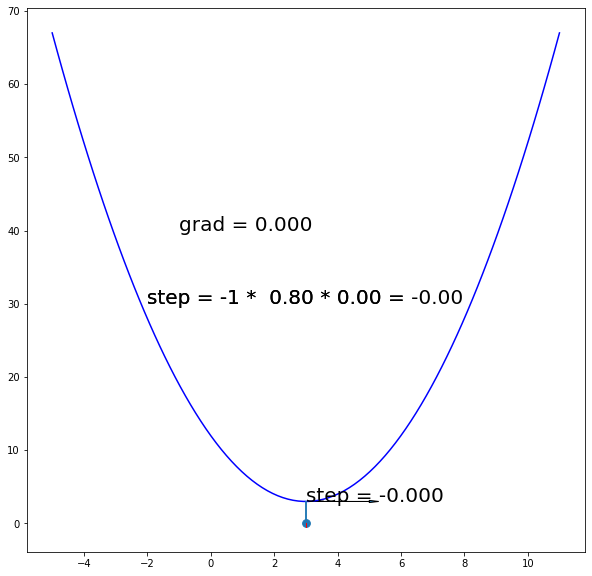

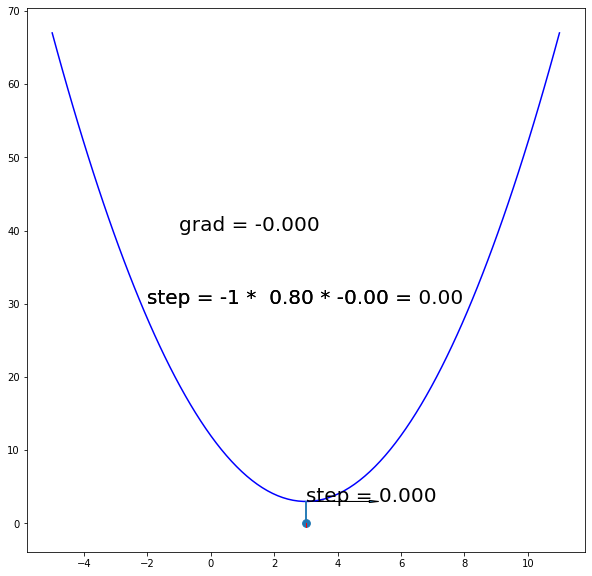

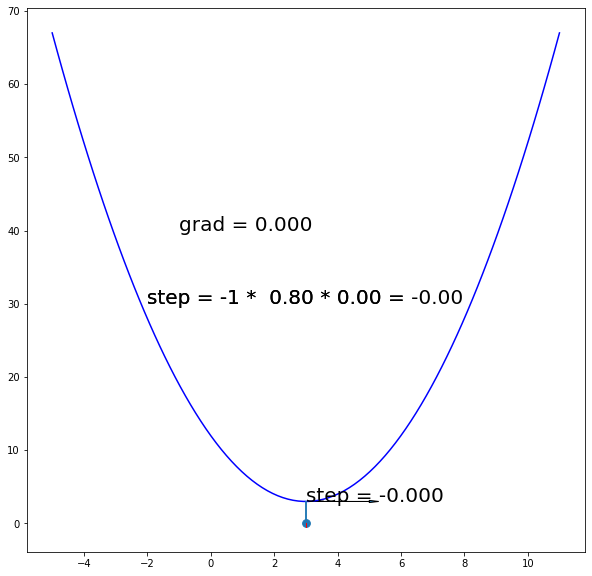

In [2]:
visualise_gradient_decsent(sec=0.5)


In [ ]:
visualise_gradient_decsent(learning_rate=1, sec=0.5)


In [ ]:
def f(x):
    return 0.5 * (x**4 - x**3 - 6 * x**2 + 30)


def grad_f(x):
    return 0.5 * (4 * x**3 - 3 * x**2 - 12 * x)


visualise_gradient_decsent(
    f, grad_f, theta=-3, learning_rate=0.02, x=np.linspace(-4, 4, 300), sec=0.3
)


In [ ]:
visualise_gradient_decsent(
    f, grad_f, theta=-3, learning_rate=0.1, x=np.linspace(-4, 4, 300), sec=0.3
)


## Gradient decsent:
$$ Cost(\theta) = \frac{1}{n} \sum\limits_{i=1}^n f(x_i,y_i,\theta)$$
$$\theta = \theta - learning\_rate * \frac{dCost}{d\theta}$$

Uczenie (optymalizacja) odbywa się w "epokach" - jedna epoka to aktualizaja wartosci parametru na podstawie całego zbioru obserwacji.

## Stochastic gradient decsent - SGD:

$$ Cost(\theta) = \frac{1}{n} \sum\limits_{i=1}^n f(x_i,y_i,\theta)$$
$$ \ \ \text{Wybieramy} \ \ \{ i_1, ..., i_r \} - \text{losowy podzbiór obserwacji}$$
$$ \tilde{Cost}(\theta) = \frac{1}{r} \sum\limits_{i \in \{ i_1, ..., i_r \} } f(x_i,y_i,\theta),$$ 
$$\theta_{new} = \theta_{old} - learning\_rate * \frac{d\tilde{Cost}}{d\theta}$$
i powtarzamy to wielokrotnie tak, żeby każda obserwacja została wykorzystana jeden raz - w praktyce mieszamy losowo kolejność obserwacji i bierzemy kolejne podzbiory - np. dla "batcha" wielkości 10, uczymy kolejno na obserwacjach od 1 do 10, od 11 do 20, itd.. Przejście po całych danych to jedna *epoka*.

SGD jest fundamentalnym algorytmem uczenia sieci neuronowych wszelkiego rodzaju. W praktyce wykorzystuje się różne modyfikacje tego algorytmu (np. "adam").

# Neuron

<img src="Grafika/neuron.jpg" width="500">

Źródło: https://cdn-images-1.medium.com/max/1600/0*l4ohhbrwQ5MGvmGc.jpg

<br>
<br>

<img src="Grafika/perceptron.gif" width="400">

Źródło: http://blog.zabarauskas.com/img/perceptron.gif

$\sigma(\cdot)$ - funkcja aktywacji

## $\sigma(x) = \frac{1}{1+\exp{(x)}}$

W praktyce popularne są trzy funkcje aktywacji:

- sigmoid
- tangens hiperboliczny
- RELU: $relu(x) = \max{(x,0)}$.

# Neuron jako klasyfikator:  Perceptron

![](Grafika/Perceptron_44381865.png)

## Aktualizacja

![](Grafika/symbolic-representation-of-perceptron-learning-rule_5.avif)

In [3]:
from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ("s", "x", "o", "^", "v")
    colors = ("red", "blue", "lightgreen", "gray", "cyan")
    cmap = ListedColormap(colors[: len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(
        np.arange(x1_min, x1_max, resolution),
        np.arange(x2_min, x2_max, resolution),
    )
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(
            x=X[y == cl, 0],
            y=X[y == cl, 1],
            alpha=0.8,
            c=cmap(idx),
            marker=markers[idx],
            label=cl,
        )


class Perceptron(object):
    def __init__(self, eta=0.1, epochs=50):
        self.eta = eta
        self.epochs = epochs

    def train(self, X, y):

        self.w_ = np.zeros(1 + X.shape[1])
        self.w_[0] = -50
        self.w_[1] = 10
        self.w_[2] = 1
        self.errors_ = []

        for i in range(self.epochs):

            plt.figure(figsize=(5, 5))

            errors = 0
            for xi, target in zip(X, y):

                update = self.eta * (target - self.predict(xi)) #eta(learning rate) * blad
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)

            plt.scatter(X[:, 0], X[:, 1], c=y)
            plt.plot(
                np.linspace(4, 7, 100),
                -1
                * (self.w_[0] + self.w_[1] * np.linspace(4, 7, 100))
                / self.w_[2],
            )
            plt.title("Perceptron")
            plt.xlabel("sepal length [cm]")
            plt.ylabel("petal length [cm]")
            plt.xlim(4, 7)
            plt.ylim(-1, 6)
            display.clear_output(wait=True)
            display.display(plt.gcf())
            time.sleep(1)

            self.errors_.append(errors)

        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)


# Wizualizacja procesu uczenia

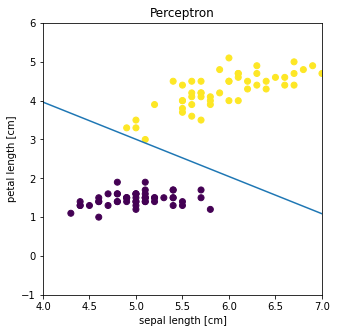

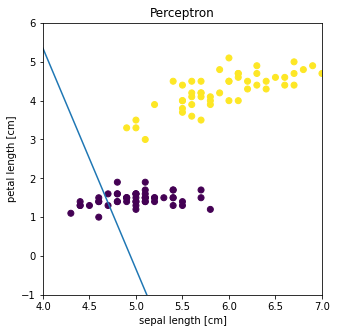

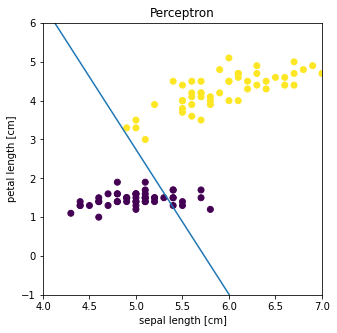

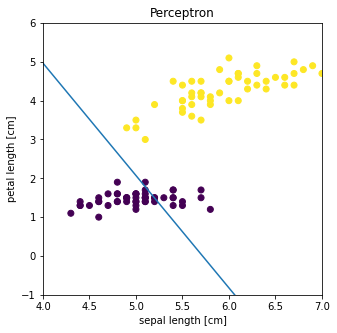

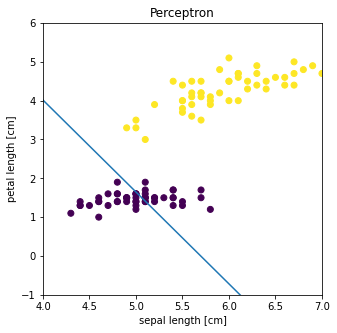

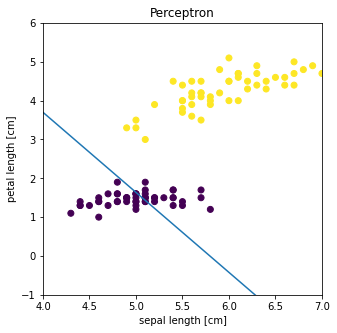

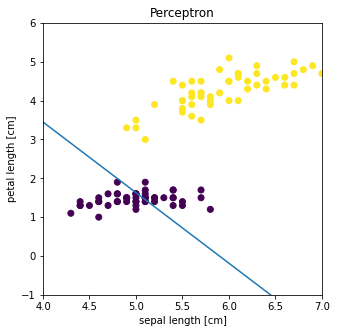

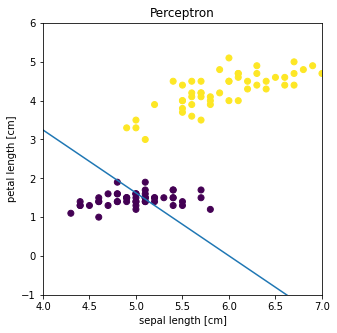

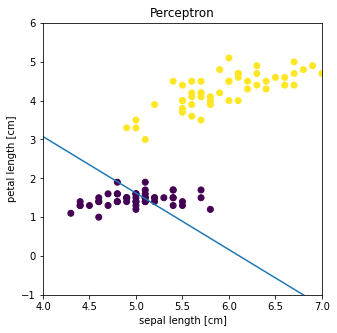

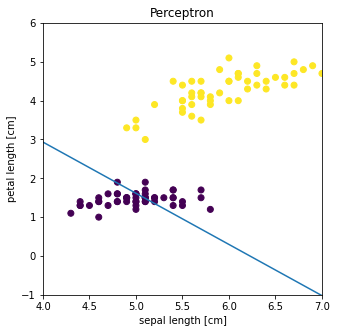

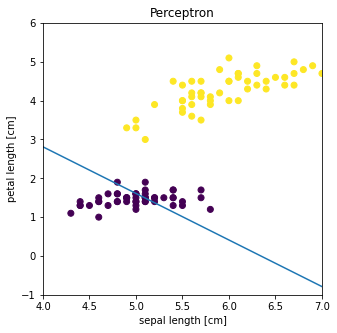

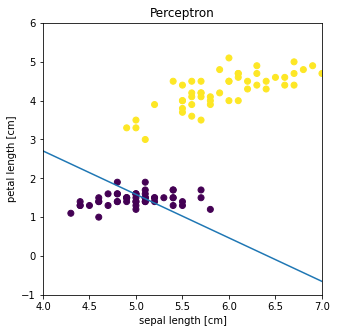

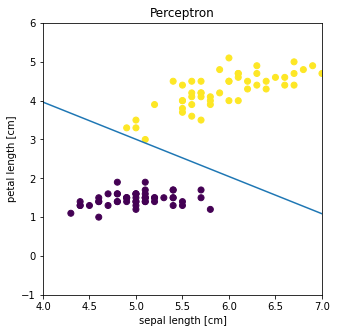

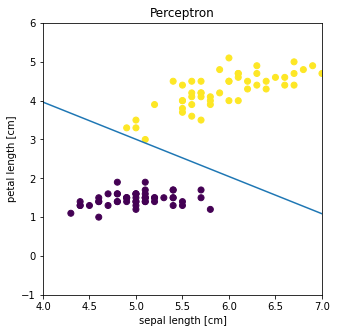

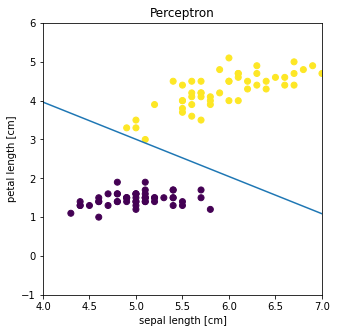

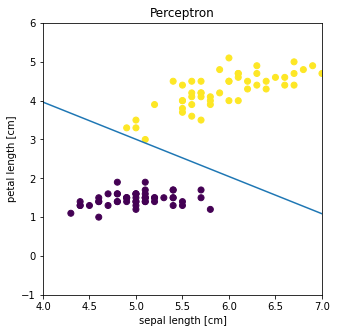

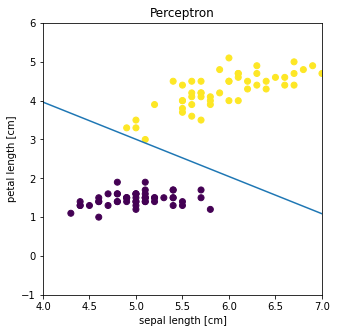

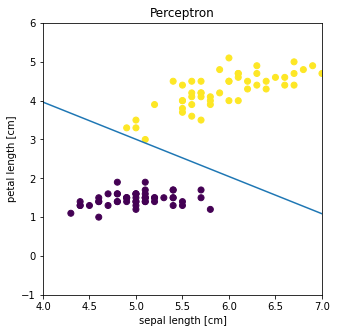

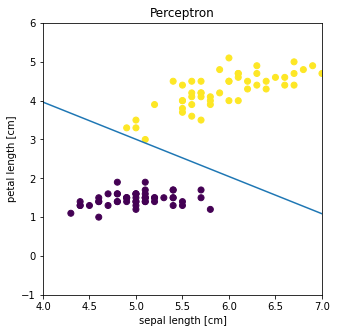

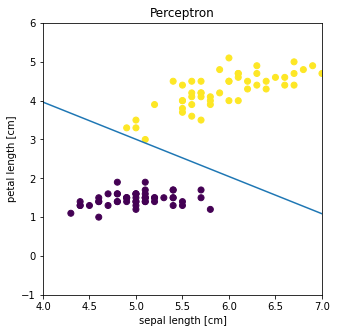

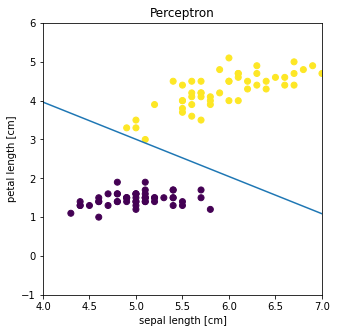

In [4]:
import numpy as np
import pandas as pd

df = pd.read_csv("Dane/iris.data", header=None)

# setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == "Iris-setosa", -1, 1)

# sepal length and petal length
X = df.iloc[0:100, [0, 2]].values

ppn = Perceptron(epochs=20, eta=0.15)
ppn.train(X, y)


# Wielowarstwowa sieć neuronowa

(*Multilayer perceptron*, *feedforward neural network*)


![]("Grafika/MLP.jpg")
Źródło: https://www.intechopen.com/source/html/39071/media/f2.jpg


**Uwaga:** "Input layer" pomimo tego, że ma w nazwie słowo "warstwa", to tak naprawdę to nie jest żadna warstwa sieci... To są po prostu dane wejściowe... Przyjęło się literaturze nazywanie tego w ten sposób, co jest trochę mylące :(


Sieci uczy sie metodą spadku gradientu (pewnymi wariantami tej metody). Uczenie wykorzystuje algorytm **propagacji wsteczej** (https://en.wikipedia.org/wiki/Backpropagation).

<br>

<br>

<br>

**Uwaga!** Sieci neuronowe absolutnie zawsze wymagają zestandaryzowanych danych! Niezależnie od tego czy wykorzystujemy regularyzację czy nie i niezależnie od typu sieci!

<br>

<br>

## Wizualizacja obszarów decyzyjnych w zależności od liczby neuronów

### (sieć jednowarstwowa)

<img src="Grafika/nn-from-scratch-hidden-layer-varying-655x1024.png" width="700">
Źródło: http://d3kbpzbmcynnmx.cloudfront.net/wp-content/uploads/2015/09/nn-from-scratch-hidden-layer-varying-655x1024.png

<br>

### Fakt matematyczny: jednowarstwową siecią możemy otrzymać dowolny kształt. 

Co z tego wynika? To, że (teoretycznie) zawsze wystarczy sieć jednowarstwowa (odpowiednio duża). W praktyce rzeczywiście z reguły wystarcza jedna warstwa! Ale mimo wszystko można sprawdzić czy 2 lub 3 warstwy nie zadziałają przypadkiem lepiej. Przy czym jeżeli dla dwóch warstw jest gorzej, to nie ma sensu sprawdzać dla trzech.

# 1. Sieci wielowarstwowe - klasyfikacja na zwykłym zbiorze, testowanie warstw, dropoutów

In [15]:
import numpy as np

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import roc_auc_score, accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [16]:
dataset = np.loadtxt("Dane/pima-indians-diabetes.data", delimiter=",")
X = dataset[:, :8]
y = dataset[:, 8]

print(X.shape)
print(np.mean(y))

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=123
)

models = [
    make_pipeline(StandardScaler(), LogisticRegression()),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
]

for model in models:

    model.fit(X_train, y_train)
    probs = model.predict_proba(X_test)[:, 1]
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(
        "Accuracy: %.2f%%" % (accuracy * 100.0),
        "AUC: ",
        roc_auc_score(y_true=y_test, y_score=probs),
    )


(768, 8)
0.3489583333333333
Accuracy: 78.74% AUC:  0.8479873924748835
Accuracy: 69.29% AUC:  0.6668855473110513
Accuracy: 75.20% AUC:  0.8425044323330488


In [17]:
from sklearn.neural_network import MLPClassifier


In [18]:
?MLPClassifier

Sieć MLP w sklearnie domyślnie zatrzymuje uczenie na podstawie tego co się dzieje w treningowym! Na to sobie można pozwolić, gdy pracujemy nad prostym problemem klasyfikacji na danych tabelarycznych. Przy bardziej złożonych problemach, podchodzimy do tego inaczej!

In [19]:
model = MLPClassifier(10)
model.fit(X_train, y_train)
probs = model.predict_proba(X_test)[:, 1]
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(
    "Accuracy: %.2f%%" % (accuracy * 100.0),
    "AUC: ",
    roc_auc_score(y_test, probs),
)


Accuracy: 65.35% AUC:  0.6455446844835511


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Teraz tak jak powinno być:

In [20]:
model = make_pipeline(StandardScaler(), MLPClassifier(10))
model.fit(X_train, y_train)
probs = model.predict_proba(X_test)[:, 1]
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(
    "Accuracy: %.2f%%" % (accuracy * 100.0),
    "AUC: ",
    roc_auc_score(y_test, probs),
)


Accuracy: 77.17% AUC:  0.8351172105850679


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [21]:
model = make_pipeline(StandardScaler(), MLPClassifier(3, max_iter=1000))
model.fit(X_train, y_train)
probs = model.predict_proba(X_test)[:, 1]
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(
    "Accuracy: %.2f%%" % (accuracy * 100.0),
    "AUC: ",
    roc_auc_score(y_test, probs),
)


Accuracy: 78.35% AUC:  0.8495633331144528


In [22]:
model = make_pipeline(StandardScaler(), MLPClassifier((5, 5), max_iter=1000))
model.fit(X_train, y_train)
probs = model.predict_proba(X_test)[:, 1]
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(
    "Accuracy: %.2f%%" % (accuracy * 100.0),
    "AUC: ",
    roc_auc_score(y_test, probs),
)


Accuracy: 76.77% AUC:  0.8340665834920218


In [25]:
model.named_steps["mlpclassifier"].coefs_[0]


array([[-0.10150078, -0.63400766, -0.06493901, -0.32938523, -0.01870267],
       [-0.30225451, -0.37352179, -0.27953693, -0.91043626,  0.65748191],
       [-0.44031676, -0.1631246 ,  0.0353133 ,  0.59109783, -0.3172625 ],
       [ 0.13072778, -0.23097673,  0.56418455, -0.09462195, -0.04439782],
       [ 0.01217914,  0.713821  ,  0.54664893, -0.34690078, -0.26491918],
       [-0.98099397,  0.84569654,  0.13619281, -0.31335679,  0.22872199],
       [-0.50130063,  0.41669218,  0.56286113, -0.3786514 , -0.14233056],
       [ 0.19271658, -0.37985603,  0.16189505, -1.14975291, -0.21238371]])

In [ ]:
plt.plot(model.named_steps["mlpclassifier"].loss_curve_)
plt.show()


### Zadanie

Zachowanie sieci w zależności od liczby neuronów:

Ustaw `max_iter=10000, alpha=0` oraz tahngens hiperboliczny jako funkcję aktywacji. Oceń skuteczność predykcji i dopasowanie dla sieci jednowarstwowej o nastepujących liczbach neuronów: [3,5,10,15,25,50,100,200,300,500].

In [29]:
for hidden_layer_size in [3, 5, 10, 15, 25, 50, 100]:

    model = make_pipeline(
        StandardScaler(),
        MLPClassifier(hidden_layer_size, activation="tanh", tol=0.0001, max_iter=1000),
    )
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    y_fitted = model.predict(X_train)

    accuracy_test = accuracy_score(y_test, y_pred)
    accuracy_train = accuracy_score(y_train, y_fitted)


    print(
        hidden_layer_size,
        "Accuracy test: %.2f%%" % (accuracy_test * 100.0),
        "Train: %.2f%%" % (accuracy_train * 100.0),
        "Iter: ",
        model.named_steps["mlpclassifier"].n_iter_,
    )


3 Accuracy test: 79.92% Train: 77.04% Iter:  331
5 Accuracy test: 78.74% Train: 78.40% Iter:  253
10 Accuracy test: 77.95% Train: 79.38% Iter:  400


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


15 Accuracy test: 74.41% Train: 85.21% Iter:  1000


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


25 Accuracy test: 74.80% Train: 88.72% Iter:  1000


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


50 Accuracy test: 74.41% Train: 88.52% Iter:  1000
100 Accuracy test: 74.41% Train: 89.88% Iter:  1000


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Widzimy przeuczenie w niektórych przypadkach - tam gdzie jest duża różnica między dopasowaniem na zbiorze treningowym a testowym.

Teraz już poprawnie - sieć zatrzyma się, gdy się stabilizuje:

In [26]:
for hidden_layer_size in [3, 5, 10, 15, 25, 50, 100]:

    model = make_pipeline(
        StandardScaler(),
        MLPClassifier(hidden_layer_size, activation="tanh", tol=0.001),
    )
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    y_fitted = model.predict(X_train)

    accuracy_test = accuracy_score(y_test, y_pred)
    accuracy_train = accuracy_score(y_train, y_fitted)

    print(
        hidden_layer_size,
        "Accuracy test: %.2f%%" % (accuracy_test * 100.0),
        "Train: %.2f%%" % (accuracy_train * 100.0),
        "Iter: ",
        model.named_steps["mlpclassifier"].n_iter_,
    )


3 Accuracy test: 66.93% Train: 68.48% Iter:  103
5 Accuracy test: 77.56% Train: 75.88% Iter:  167
10 Accuracy test: 77.95% Train: 74.90% Iter:  59
15 Accuracy test: 76.77% Train: 76.07% Iter:  98
25 Accuracy test: 79.13% Train: 76.46% Iter:  57
50 Accuracy test: 80.31% Train: 76.46% Iter:  47
100 Accuracy test: 78.74% Train: 77.24% Iter:  41


Zauważmy, że najmniejsza sieć (5 neuronów) daje praktycznie takie same wyniki jak większe sieci -> jeżeli różne sieci działają tak samo, to oczywiście bierzemy mniejszą (prostszy model).

### Zadanie

Przetestuj kilka wariantów sieci dwuwarstowe. (wykorzystaj `itertools.product`)

In [37]:
for hidden_layer_size in itertools.product([3, 5, 10, 15, 25, 50, 100], [1, 2, 3, 4, 5]):
    model = make_pipeline(
        StandardScaler(),
        MLPClassifier(hidden_layer_size, activation="tanh", tol=0.001),
    )
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    y_fitted = model.predict(X_train)

    accuracy_test = accuracy_score(y_test, y_pred)
    accuracy_train = accuracy_score(y_train, y_fitted)

    print(
        hidden_layer_size,
        "Accuracy test: %.2f%%" % (accuracy_test * 100.0),
        "Train: %.2f%%" % (accuracy_train * 100.0),
        "Iter: ",
        model.named_steps["mlpclassifier"].n_iter_,
    )

(3, 1) Accuracy test: 61.81% Train: 66.73% Iter:  162
(3, 2) Accuracy test: 74.02% Train: 73.15% Iter:  106
(3, 3) Accuracy test: 74.41% Train: 72.76% Iter:  200
(3, 4) Accuracy test: 77.95% Train: 76.46% Iter:  135


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


(3, 5) Accuracy test: 73.23% Train: 74.12% Iter:  109
(5, 1) Accuracy test: 61.81% Train: 66.73% Iter:  53
(5, 2) Accuracy test: 79.13% Train: 76.26% Iter:  141
(5, 3) Accuracy test: 62.60% Train: 68.09% Iter:  64
(5, 4) Accuracy test: 75.20% Train: 76.46% Iter:  110
(5, 5) Accuracy test: 77.56% Train: 77.63% Iter:  100
(10, 1) Accuracy test: 78.35% Train: 77.82% Iter:  183
(10, 2) Accuracy test: 61.81% Train: 66.73% Iter:  72
(10, 3) Accuracy test: 77.17% Train: 75.68% Iter:  75
(10, 4) Accuracy test: 80.71% Train: 75.49% Iter:  82
(10, 5) Accuracy test: 78.74% Train: 78.02% Iter:  58
(15, 1) Accuracy test: 80.71% Train: 76.46% Iter:  29
(15, 2) Accuracy test: 79.92% Train: 78.40% Iter:  105
(15, 3) Accuracy test: 79.53% Train: 78.21% Iter:  90
(15, 4) Accuracy test: 79.13% Train: 77.24% Iter:  86
(15, 5) Accuracy test: 77.56% Train: 78.40% Iter:  74
(25, 1) Accuracy test: 79.13% Train: 76.26% Iter:  141
(25, 2) Accuracy test: 79.13% Train: 77.63% Iter:  64
(25, 3) Accuracy test: 78.3

In [33]:
import itertools

In [34]:
itertools.product()

Widzimy przeuczenie w części sieci.

Dodanie warstwy nie poprawiło wyników, więc nie ma sensu próbować dodawania kolejnych.

### Powyższe podejście do zatrzymywania uczenia jest akceptowalne tylko w prostych problemach. Ogólnie należy uczyć inaczej: early stopping!

<img src="Grafika/early_stopping.png" width="400">

Źródło: http://fouryears.eu/2017/12/06/the-mystery-of-early-stopping/comment-page-1/


In [ ]:
model = make_pipeline(
    StandardScaler(),
    MLPClassifier(
        10,
        activation="tanh",
        early_stopping=True,
        validation_fraction=0.1,
        n_iter_no_change=30,
    ),
)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


accuracy_test = accuracy_score(y_test, y_pred)
print(
    "Accuracy Test: %.2f%%" % (accuracy_test * 100.0),
    "Number of steps:",
    model.named_steps["mlpclassifier"].n_iter_,
)


In [64]:
for hidden_layer_size in itertools.product([25, 50, 100, 150, 200], [1, 3, 5, 7, 9]):
    model = make_pipeline(
        StandardScaler(),
        MLPClassifier(hidden_layer_size,
                      activation="tanh",
                      tol=0.001,
                      early_stopping=True,
                      validation_fraction=0.1,
                      n_iter_no_change=30,
                      ),
    )
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    y_fitted = model.predict(X_train)

    accuracy_test = accuracy_score(y_test, y_pred)
    accuracy_train = accuracy_score(y_train, y_fitted)

    print(
        hidden_layer_size,
        "Accuracy test: %.2f%%" % (accuracy_test * 100.0),
        "Train: %.2f%%" % (accuracy_train * 100.0),
        "Iter: ",
        model.named_steps["mlpclassifier"].n_iter_,
    )

(25, 1) Accuracy test: 18.61% Train: 19.28% Iter:  33


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


(25, 3) Accuracy test: 81.39% Train: 90.26% Iter:  200
(25, 5) Accuracy test: 92.50% Train: 98.75% Iter:  184
(25, 7) Accuracy test: 92.22% Train: 97.29% Iter:  125
(25, 9) Accuracy test: 94.44% Train: 98.82% Iter:  117
(50, 1) Accuracy test: 20.00% Train: 17.40% Iter:  34
(50, 3) Accuracy test: 64.72% Train: 64.30% Iter:  92
(50, 5) Accuracy test: 93.89% Train: 98.89% Iter:  185
(50, 7) Accuracy test: 94.44% Train: 98.68% Iter:  124
(50, 9) Accuracy test: 94.44% Train: 98.96% Iter:  126
(100, 1) Accuracy test: 16.94% Train: 18.93% Iter:  42
(100, 3) Accuracy test: 73.61% Train: 78.91% Iter:  152
(100, 5) Accuracy test: 90.28% Train: 95.27% Iter:  87
(100, 7) Accuracy test: 94.72% Train: 99.51% Iter:  122
(100, 9) Accuracy test: 93.06% Train: 97.36% Iter:  64
(150, 1) Accuracy test: 19.17% Train: 21.99% Iter:  34
(150, 3) Accuracy test: 63.61% Train: 71.05% Iter:  94
(150, 5) Accuracy test: 94.17% Train: 98.75% Iter:  130
(150, 7) Accuracy test: 90.56% Train: 96.94% Iter:  76
(150, 9) 

Uwaga: trzeba uważać na to, żeby zbiór walidacyjny był wystarczająco duży, żeby o końcu uczenia nie zadecydował czynnik losowy!

Jednakże w praktyce sieci neuronowe stosuje się do raczej dużych zbiorów danych, bo dla małych lepeij działąja prostsze modele.

# Uwaga

W różnych materiałach możemy sie spotkać z tego typu kodem: 

model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=25) # uczenie sieci

model.evaluate(X_test, y_test) # ocena sieci


Takie coś nie ma prawa pojawić się w poprawnym modelowaniu, bo:

1. W czasie uczenia wykorzystujemy zbiór testowy (jako walidacyjny) - nie daje to rzetelnej oceny jakości modelu.
2. Liczba epok jest ustalona - tak się nie robi (poza wyjątkowymi sytuacjami).


<br>



### Ćwiczenie

Zoptymalizuj i oceń sieć neuronową na danych digits.

In [60]:
from sklearn.datasets import load_digits

digits = load_digits()
X, y = digits.data, digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)


In [61]:
model = make_pipeline(
    StandardScaler(),
    MLPClassifier(
        10,
        activation="tanh",
        early_stopping=True,
        validation_fraction=0.1,
        n_iter_no_change=30,
    ),
)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


accuracy_test = accuracy_score(y_test, y_pred)
print(
    "Accuracy Test: %.2f%%" % (accuracy_test * 100.0),
    "Number of steps:",
    model.named_steps["mlpclassifier"].n_iter_,
)

Accuracy Test: 94.44% Number of steps: 149


## Keras

In [65]:
cancer = load_breast_cancer()
X, y = cancer.data, cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)


In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [45]:
?Dense

In [66]:
model = Sequential()
model.add(Dense(10, activation="sigmoid", input_shape=(X_train.shape[1],)))
model.add(Dense(10, activation="sigmoid"))
model.add(Dense(1, activation="sigmoid"))

In [67]:
model.compile(
    loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"]
)


In [68]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 10)                310       
                                                                 
 dense_4 (Dense)             (None, 10)                110       
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 431
Trainable params: 431
Non-trainable params: 0
_________________________________________________________________


In [69]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [70]:
?model.fit

In [71]:
history = model.fit(X_train, y_train, batch_size=16, epochs=10)


Epoch 1/10
25/25 [==============================] - 0s 2ms/step - loss: 0.6390 - accuracy: 0.8241
Epoch 2/10
25/25 [==============================] - 0s 903us/step - loss: 0.5884 - accuracy: 0.8719
Epoch 3/10
25/25 [==============================] - 0s 1ms/step - loss: 0.5471 - accuracy: 0.8693
Epoch 4/10
25/25 [==============================] - 0s 746us/step - loss: 0.5108 - accuracy: 0.8794
Epoch 5/10
25/25 [==============================] - 0s 986us/step - loss: 0.4741 - accuracy: 0.9246
Epoch 6/10
25/25 [==============================] - 0s 896us/step - loss: 0.4375 - accuracy: 0.9372
Epoch 7/10
25/25 [==============================] - 0s 1ms/step - loss: 0.4024 - accuracy: 0.9422
Epoch 8/10
25/25 [==============================] - 0s 869us/step - loss: 0.3684 - accuracy: 0.9447
Epoch 9/10
25/25 [==============================] - 0s 778us/step - loss: 0.3373 - accuracy: 0.9497
Epoch 10/10
25/25 [==============================] - 0s 2ms/step - loss: 0.3085 - accuracy: 0.9623


In [52]:
history.history


{'loss': [0.680427074432373,
  0.6386476159095764,
  0.6014920473098755,
  0.5646967887878418,
  0.52518630027771,
  0.4840782880783081,
  0.44306981563568115,
  0.40389183163642883,
  0.3678053021430969,
  0.3351054787635803],
 'accuracy': [0.5678392052650452,
  0.6331658363342285,
  0.7110552787780762,
  0.7964823842048645,
  0.8819095492362976,
  0.9120603203773499,
  0.927135705947876,
  0.9346733689308167,
  0.9447236061096191,
  0.9447236061096191]}

In [72]:
import matplotlib.pyplot as plt


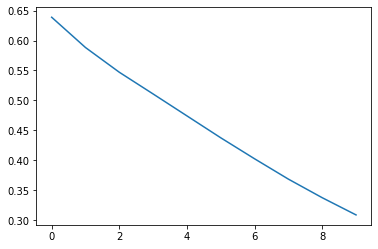

In [73]:
plt.plot(history.history["loss"])


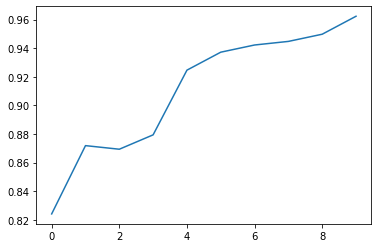

In [74]:
plt.plot(history.history["accuracy"])


In [75]:
model.predict(X_test)[:3]


6/6 [==============================] - 0s 1ms/step


array([[0.5730522 ],
       [0.8570818 ],
       [0.70053655]], dtype=float32)

In [76]:
accuracy_score(y_test, model.predict(X_test) > 0.5)


6/6 [==============================] - 0s 2ms/step


0.9707602339181286

In [79]:
from sklearn.metrics import classification_report

In [80]:
print(classification_report(y_test, model.predict(X_test) > 0.5))


6/6 [==============================] - 0s 998us/step
              precision    recall  f1-score   support

           0       0.97      0.95      0.96        59
           1       0.97      0.98      0.98       112

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



Z early stopping:

In [81]:
from tensorflow.keras.callbacks import EarlyStopping


In [ ]:
?EarlyStopping

In [82]:
model = Sequential()
model.add(Dense(10, activation="sigmoid", input_shape=(X_train.shape[1],)))
model.add(Dense(1, activation="sigmoid"))

model.compile(
    loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"]
)
model.summary()

early_stopping = EarlyStopping(patience=3, monitor="val_loss")
model.fit(
    X_train,
    y_train,
    batch_size=16,
    validation_split=0.15,
    callbacks=[early_stopping],
    epochs=100,
)


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                310       
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
22/22 [==============================] - 0s 6ms/step - loss: 0.6744 - accuracy: 0.5947 - val_loss: 0.6502 - val_accuracy: 0.6667
Epoch 2/100
22/22 [==============================] - 0s 979us/step - loss: 0.5832 - accuracy: 0.8284 - val_loss: 0.5858 - val_accuracy: 0.7333
Epoch 3/100
22/22 [==============================] - 0s 1ms/step - loss: 0.5076 - accuracy: 0.8905 - val_loss: 0.5302 - val_accuracy: 0.8000
Epoch 4/100
22/22 [========

In [83]:
accuracy_score(y_test, model.predict(X_test) > 0.5)


6/6 [==============================] - 0s 885us/step


0.9824561403508771

In [84]:
print(classification_report(y_test, model.predict(X_test) > 0.5))


6/6 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        59
           1       0.97      1.00      0.99       112

    accuracy                           0.98       171
   macro avg       0.99      0.97      0.98       171
weighted avg       0.98      0.98      0.98       171



## Regularyzacja

Regularyzacja klasyczna - do funkcji kosztu dodajemy karę za wielkości współczynników - wag sieci (jak w regresji liniowej i logistycznej)

In [86]:
from tensorflow.keras.regularizers import l2, l1


In [87]:
model = Sequential()
model.add(
    Dense(
        10,
        activation="sigmoid",
        input_shape=(X_train.shape[1],),
        kernel_regularizer=l2(0.01),
    )
)
model.add(Dense(10, activation="sigmoid", kernel_regularizer=l2(0.01)))
model.add(Dense(1, activation="sigmoid", kernel_regularizer=l2(0.01)))

model.compile(
    loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"]
)
model.summary()

early_stopping = EarlyStopping(patience=3, monitor="val_loss")
model.fit(
    X_train,
    y_train,
    batch_size=16,
    validation_split=0.15,
    callbacks=[early_stopping],
    epochs=100,
)


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 10)                310       
                                                                 
 dense_9 (Dense)             (None, 10)                110       
                                                                 
 dense_10 (Dense)            (None, 1)                 11        
                                                                 
Total params: 431
Trainable params: 431
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
22/22 [==============================] - 1s 4ms/step - loss: 0.9192 - accuracy: 0.6183 - val_loss: 0.9203 - val_accuracy: 0.6000
Epoch 2/100
22/22 [==============================] - 0s 852us/step - loss: 0.8758 - accuracy: 0.6183 - val_loss: 0.8832 - val_accuracy: 0.6000
Epoch 3/100
22/22 [=================

In [88]:
model.evaluate(X_test, y_test)


6/6 [==============================] - 0s 2ms/step - loss: 0.4045 - accuracy: 0.9708


[0.40454038977622986, 0.9707602262496948]

## Regularyzacja dropout


<img src="Grafika/dropout.jpeg" width="550">


In [89]:
from tensorflow.keras.layers import Dropout


model = Sequential()
model.add(
    Dense(
        10,
        activation="sigmoid",
        input_shape=(X_train.shape[1],),
        kernel_regularizer=l2(0.01),
    )
)
model.add(Dropout(0.5))
model.add(Dense(10, activation="sigmoid", kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(1, activation="sigmoid", kernel_regularizer=l2(0.01)))

model.compile(
    loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"]
)
model.summary()

early_stopping = EarlyStopping(patience=3, monitor="val_loss")
model.fit(
    X_train,
    y_train,
    batch_size=16,
    validation_split=0.15,
    callbacks=[early_stopping],
    epochs=100,
)

model.evaluate(X_test, y_test)


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 10)                310       
                                                                 
 dropout (Dropout)           (None, 10)                0         
                                                                 
 dense_12 (Dense)            (None, 10)                110       
                                                                 
 dropout_1 (Dropout)         (None, 10)                0         
                                                                 
 dense_13 (Dense)            (None, 1)                 11        
                                                                 
Total params: 431
Trainable params: 431
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
22/22 [==============================] - 0s 

[0.476816862821579, 0.9415204524993896]

In [90]:
model.evaluate(X_test, y_test)


6/6 [==============================] - 0s 2ms/step - loss: 0.4768 - accuracy: 0.9415


[0.476816862821579, 0.9415204524993896]


## Funckje straty

Funkcje starty dają modelowi miarę tego jak bardzo on się myli. Jeżeli funkcja straty jest różniczkowalna to można wykorzystać algorytm spadku gradientu do tego by ją minimalizować. Dobór funkcji straty mówi o tym jakie zadanie nasz model ma realizować

Problem regresji:
* MSE(średnio kwadratowa funkcja starty): $\sum (y-\hat{y})^2$
* MAE(średni błąd bezwględny): $\sum |y-\hat{y}|$
* Huber Loss

![](Grafika/huber_loss.png)

Problem klasyfikacji:
* Binary cross entropy

![](Grafika/binary_cross_entropy.png)
* Categorical cross entropy

![](Grafika/cross_entropy.png)

W kerasie możemy wykorzystywać gotowe funkcje starty

[Tutaj możecie zobaczyć wszystkie dostępne funkcje starty](https://keras.io/api/losses/)

In [ ]:
import numpy as np
import tensorflow as tf


In [ ]:
mse = tf.keras.losses.MeanSquaredError(
    reduction=tf.keras.losses.Reduction.NONE
)
mae = tf.keras.losses.MeanAbsoluteError(
    reduction=tf.keras.losses.Reduction.NONE
)
huber = tf.keras.losses.Huber(
    delta=1.0, reduction=tf.keras.losses.Reduction.NONE
)


In [ ]:
y_true = np.array([[0, 1, 2]]).T
y_pred = np.array([[1, 0, 0]]).T


In [ ]:
mse(y_true, y_pred).numpy()


In [ ]:
mae(y_true, y_pred).numpy()


In [ ]:
huber(y_true, y_pred).numpy()


In [ ]:
mse = tf.keras.losses.MeanSquaredError()


In [ ]:
mse(y_true, y_pred).numpy()


Takie funkcje starty można podawać podczas kompilacji modelu

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout


In [ ]:
regression_model = Sequential()
regression_model.add(Dense(512, input_shape=(25,)))
regression_model.add(Dropout(0.5))
regression_model.add(Dense(1))
regression_model.compile(optimizer="adam", loss=mse)


## Funkcje aktywacji
Funkcje aktywacji są wykorzystywane w sieciach neuronowych aby przekształcenia nie były tylko przekształceniami lioniowymi. Wybór funkcji aktywacji dla warstw ukrytych jest częścią doboru hiperparametrów sieci neuronowej. Natomiast funkcja aktywacji na ostatniej wartswie jest zależna od problemu jaki rozwiązujemy

* Jeżeli nasza sieć ma rozwiązywać problem regresji nasza ostatnia warstwa powinna wykorzystywać identyczność jako funkcję aktywacji(Pozwala to na przyjmowanie wartości od $-\infty$ do $\infty$).
* Jeżeli wiemy, że wartości wyjsciowe mogą przyjmować tylko wartości $y\geq0$ możemy wykorzystać jako funkcję aktywacji $\exp$.
* Jeżeli mamy doczynienia z problemem klasyfikacji i chcemy klasyfikować tylko jedną klasę do danych wejsciowych należy wykorzystać $\textit{softmax}$.
$$\text{Softmax}(x_{i}) = \frac{\exp(x_i)}{\sum_j \exp(x_j)}$$
* Jeżeli mamy doczynienia z klasyfikacją wieloetykietową(np. tagowanie obrazów) powinniśmy wykorzystać $\textit{sigmoid}$. 
$$ \text{Sigmoid} (x) =\sigma(x)=  \frac{\mathrm{1} }{\mathrm{1} + e^{-x} }  $$ 

Najczęściej wykorzystywane funkcje aktywacji w warstwach ukrytych
* relu
* LeakyRelu
* selu
* elu
* gelu

Jako podstawową aktywację w wartwach ukrytych stosuje się `Relu`.

[Wszystkie dostępne funkcje aktywacji w kerasie](https://keras.io/api/layers/activations/)

In [ ]:
x = tf.convert_to_tensor(np.array([[0, 1, 2]], dtype=np.float32))
tf.keras.activations.sigmoid(x).numpy()


In [ ]:
np.sum(tf.keras.activations.sigmoid(x).numpy())


In [ ]:
tf.keras.activations.softmax(x, axis=-1).numpy()


In [ ]:
np.sum(tf.keras.activations.softmax(x, axis=-1).numpy())


Jako funkcje aktywacji możemy też podawać dowolne obiekty typu `Callable`, które jako wejście przyjmują macierze i dokonują na nich przekształcenia.

In [ ]:
regression_model = Sequential()
regression_model.add(
    Dense(512, input_shape=(25,), activation=tf.keras.activations.relu)
)
regression_model.add(Dropout(0.5))
regression_model.add(Dense(1, activation=tf.math.exp))
regression_model.compile(optimizer="adam", loss=mse)


In [ ]:
model_input = np.random.normal(size=(16, 25))
regression_model(model_input).numpy()


In [ ]:
regression_model = Sequential()
regression_model.add(
    Dense(512, input_shape=(25,), activation=tf.keras.activations.relu)
)
regression_model.add(Dropout(0.5))
regression_model.add(Dense(1))


In [ ]:
regression_model(model_input).numpy()


## Metryki w Kerasie
Podczas wykonywania metody `fit` w modelu Kerasowym możemy podawać metryki, które mają być wyliczane podczas treningu. Podajemy je do argumentu `metrics` jako listę metryk, które chcemy, żeby były wiliczane.

[Wszystkie metryki dostępne w Kerasie](https://keras.io/api/metrics/)

#### Ważne rozróżnienie pomiędzy `CategoricalAccuracy/CategoricalCrossentropy` a `SparseCategoricalAccuracy/SparseCategoricalCrossentropy`.
`Sparse` oczekuje, że jako `y_true`(przykład prawdziwy) podamy mu wektor zawierający liczby całkowite odpowiadające klasom np. [2,5,6,7,10]. Natomiast bez Sparse oczekuje, że prawdziwe dane będą zakodowane przy użyciu OHE, czyli `y_true` należy podać jako macierz o rozmiarze (liczba_przykładów x liczba_klas).

## Optimizery
Podobnie jak funkcje aktywacji w Kerasie optimizery są także dostępne jako klasy. Dzięki temu można ustawiać ich argumenty.

[Wszystkie dostępne optimizery w Kerasie](https://keras.io/api/optimizers/#available-optimizers)

In [ ]:
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=1e-2)

regression_model = Sequential()
regression_model.add(
    Dense(512, input_shape=(25,), activation=tf.keras.activations.relu)
)
regression_model.add(Dropout(0.5))
regression_model.add(Dense(1))
regression_model.compile(
    optimizer=adam_optimizer, loss=tf.keras.losses.MeanSquaredError()
)


## Callbacki
Callbacki to obiekty, które wykonują akcje w różnych etapach uczenia sieci neuronowej.

Przykłady:
* Zapisywanie aktualnego accuracy modelu pod koniec epoki
* Early stopping
* Zapisywanie wag modelu

Callbacki podajemy podczas wywoływania metody `.fit` do argumentu `callbacks` jako listę obiektów klasy `Callback`

[Callbacki zaimplementowane w Kerasie](https://keras.io/api/callbacks/#available-callbacks)

##### Obniżanie Learnning rate'u przez callabacki
Aby obniżać learning rate można wykorzystać np. `keras.callbacks.ReduceLROnPlateau`. Dodanie tego callbacku spowoduje, że jeżeli funkcja starty przestanie spadać learning rate zostanie zamieniony na `factor*learning_rate`, gdzie factor jest domyślnie ustawiony na `0.1`


In [ ]:
X = np.random.normal(size=(1000, 25))
y = np.sum(X**2, axis=-1, keepdims=True)
history = regression_model.fit(
    X,
    y,
    epochs=1000,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor="loss", patience=3, min_delta=1e-3
        )
    ],
    verbose=0,
)


In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history["loss"])


In [ ]:
regression_model.evaluate(X, y)


### Ćwiczenie

Zaimplementuj funkcję `construct_mlp(layer_sizes, activation_fun, dropout_rate, input_shape, compile=False)`, która zwraca kerasowy model, gdzie:
- `layer_sizes` - krotka rozmiarów kolejnych warstw gęstych,
- `activation_fun` - funkcja aktywacji dla warstw ukrytych,
- `dropout_rate` - stopień ewentualnego dropoutu, jeśli większy od 0, to po każdej warstwie dense w sieci umieszcamy dropout
- `input_shape` - kształt danych wejsciowych,
- `compile` - jeśli `True`, to zwracamy skompilowany model

Zakładamy, że rozwiązujemy problem klasyfikacji binarnej.

In [92]:
?Dense

In [97]:
def construct_mlp(
    layer_sizes, activation_fun, dropout_rate, input_shape, compile_model=False
):
    model = Sequential()
    model.add(
        Dense(
            layer_sizes[0],
            input_shape=input_shape,
            activation=activation_fun,
            kernel_regularizer=l2(0.01)
        )
    )
    if dropout_rate > 0:
        model.add(Dropout(dropout_rate))
    for layer_size in layer_sizes[1:]:
        model.add(
            Dense(
                layer_size,
                activation=activation_fun,
                kernel_regularizer=l2(0.01)
            )
        )
        if dropout_rate > 0:
            model.add(Dropout(dropout_rate))
    if compile_model:
        return model.compile("binary_crossentropy", optimizer="adam", metrics=["accuracy"])


## Zapisywanie i wczytywanie modelu

Przetrenowany model można zapisać przy użyciu metody `save`

In [ ]:
regression_model.save("my_model.h5")


In [ ]:
del regression_model


Wczytać można model przy użyciu funkcji `load_model` z `keras.models`.

In [ ]:
from tensorflow.keras.models import load_model


In [ ]:
model = load_model("my_model.h5")


In [ ]:
model.evaluate(X, y)
# Dostajemy taki sam wynik jak wyżej :)


32/32 [==============================] - 0s 1ms/step - loss: 2.7674


2.7674193382263184

Możemy też zapisać same wagi sieci, żeby oszczędzić miejce na dysku, ale wymaga to od nas najpierw zainicjowania modelu.

Model musi mieć dokładnie taką samą architekturę jak model, którego wagi zapisaliśmy!!!

In [ ]:
regression_model.save_weights("my_model")


In [ ]:
model = Sequential()
model.add(Dense(512, input_shape=(25,), activation=tf.keras.activations.relu))
model.add(Dropout(0.5))
model.add(Dense(1))
model.compile(
    optimizer=adam_optimizer, loss=tf.keras.losses.MeanSquaredError()
)


In [ ]:
model.load_weights("my_model")


In [ ]:
model.evaluate(X, y)


In [96]:
pip install notebook --upgrade


Note: you may need to restart the kernel to use updated packages.
